In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from scipy.stats import chi2_contingency
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/Colab Notebooks/2022dataset/subset_20k.csv'

In [ ]:
data_update = pd.read_csv(file_path)
data_update

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Texas,Female,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,No,...,1.68,113.40,40.35,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
1,Wisconsin,Female,Good,2.0,5.0,Within past year (anytime less than 12 months ...,Yes,8.0,1 to 5,No,...,1.73,104.33,34.97,Yes,Yes,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
2,Idaho,Male,Poor,7.0,10.0,Within past year (anytime less than 12 months ...,Yes,6.0,1 to 5,No,...,1.73,104.33,34.97,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
3,Iowa,Female,Good,20.0,10.0,Within past year (anytime less than 12 months ...,No,8.0,All,Yes,...,1.68,127.01,45.19,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
4,South Dakota,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.60,49.90,19.49,Yes,No,Yes,No,"Yes, received Tdap",No,Tested positive using home test without a heal...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,Maryland,Male,Very good,15.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,1 to 5,No,...,1.83,58.97,17.63,Yes,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
19996,Maryland,Male,Good,0.0,5.0,5 or more years ago,Yes,6.0,1 to 5,No,...,1.85,113.40,32.98,Yes,No,Yes,No,"Yes, received Tdap",No,No
19997,Maine,Female,Fair,4.0,12.0,Within past year (anytime less than 12 months ...,Yes,4.0,All,No,...,1.65,90.72,33.28,No,No,Yes,Yes,"Yes, received tetanus shot, but not Tdap",No,No
19998,Connecticut,Male,Good,0.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,None of them,No,...,1.91,117.93,32.50,Yes,Yes,No,No,"Yes, received Tdap",No,Yes


In [ ]:
data_update.isna().sum()

,0
State,0
Sex,0
GeneralHealth,0
PhysicalHealthDays,0
MentalHealthDays,0
LastCheckupTime,0
PhysicalActivities,0
SleepHours,0
RemovedTeeth,0
HadHeartAttack,0


In [ ]:
data_update.duplicated().sum()

0

In [ ]:
data_copy1 = data_update.copy()
data_copy2 = data_update.copy()
data_copy3 = data_update.copy()

In [ ]:
data_copy1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   State                      20000 non-null  object 
 1   Sex                        20000 non-null  object 
 2   GeneralHealth              20000 non-null  object 
 3   PhysicalHealthDays         20000 non-null  float64
 4   MentalHealthDays           20000 non-null  float64
 5   LastCheckupTime            20000 non-null  object 
 6   PhysicalActivities         20000 non-null  object 
 7   SleepHours                 20000 non-null  float64
 8   RemovedTeeth               20000 non-null  object 
 9   HadHeartAttack             20000 non-null  object 
 10  HadAngina                  20000 non-null  object 
 11  HadStroke                  20000 non-null  object 
 12  HadAsthma                  20000 non-null  object 
 13  HadSkinCancer              20000 non-null  obj

In [ ]:
data_copy1.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000
mean,4.126950,4.18775,6.992300,1.703864,83.576607,28.700290
std,8.394615,8.15706,1.450154,0.106953,21.369479,6.545739
min,0.000000,0.00000,1.000000,0.970000,34.020000,12.360000
25%,0.000000,0.00000,6.000000,1.630000,68.040000,24.280000
50%,0.000000,0.00000,7.000000,1.700000,81.650000,27.460000
75%,3.000000,4.00000,8.000000,1.780000,95.250000,31.890000
max,30.000000,30.00000,24.000000,2.290000,249.480000,83.450000


In [ ]:
data_copy1.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [ ]:
numerical_cols = data_copy1.select_dtypes(include=['float64','number']).columns
numerical_data = data_copy1[numerical_cols]
numerical_data

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
0,0.0,0.0,8.0,1.68,113.40,40.35
1,2.0,5.0,8.0,1.73,104.33,34.97
2,7.0,10.0,6.0,1.73,104.33,34.97
3,20.0,10.0,8.0,1.68,127.01,45.19
4,0.0,0.0,7.0,1.60,49.90,19.49
...,...,...,...,...,...,...
19995,15.0,0.0,8.0,1.83,58.97,17.63
19996,0.0,5.0,6.0,1.85,113.40,32.98
19997,4.0,12.0,4.0,1.65,90.72,33.28
19998,0.0,3.0,5.0,1.91,117.93,32.50


In [ ]:
categorical_cols = data_copy1.select_dtypes(include=['object','category']).columns
for col in categorical_cols:
    print(f"Levels in '{col}': {data_update[col].unique()}")
    print(f"Number of levels: {data_update[col].nunique()}")
    print('-' * 40)

Levels in 'State': ['Texas' 'Wisconsin' 'Idaho' 'Iowa' 'South Dakota' 'Maryland' 'Maine'
 'Ohio' 'Illinois' 'Colorado' 'Kentucky' 'Delaware' 'California' 'Utah'
 'Indiana' 'Michigan' 'New Hampshire' 'Washington' 'Arkansas' 'Florida'
 'New Mexico' 'Louisiana' 'Georgia' 'Oregon' 'New York' 'Nebraska'
 'Mississippi' 'Massachusetts' 'Tennessee' 'Virginia' 'Kansas'
 'Puerto Rico' 'Minnesota' 'South Carolina' 'Hawaii' 'North Carolina'
 'Nevada' 'Montana' 'North Dakota' 'Wyoming' 'Vermont'
 'District of Columbia' 'West Virginia' 'New Jersey' 'Guam' 'Rhode Island'
 'Alabama' 'Connecticut' 'Missouri' 'Oklahoma' 'Arizona' 'Virgin Islands'
 'Pennsylvania' 'Alaska']
Number of levels: 54
----------------------------------------
Levels in 'Sex': ['Female' 'Male']
Number of levels: 2
----------------------------------------
Levels in 'GeneralHealth': ['Good' 'Poor' 'Excellent' 'Very good' 'Fair']
Number of levels: 5
----------------------------------------
Levels in 'LastCheckupTime': ['Within past y

In [ ]:
data_copy1['HeartConditionBinary'] = ((data_copy1['HadHeartAttack'] == 'Yes') | (data_copy1['HadAngina'] == 'Yes')).astype(int)
data_copy1

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,HeartConditionBinary
0,Texas,Female,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,No,...,113.40,40.35,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes,0
1,Wisconsin,Female,Good,2.0,5.0,Within past year (anytime less than 12 months ...,Yes,8.0,1 to 5,No,...,104.33,34.97,Yes,Yes,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No,0
2,Idaho,Male,Poor,7.0,10.0,Within past year (anytime less than 12 months ...,Yes,6.0,1 to 5,No,...,104.33,34.97,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No,1
3,Iowa,Female,Good,20.0,10.0,Within past year (anytime less than 12 months ...,No,8.0,All,Yes,...,127.01,45.19,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes,1
4,South Dakota,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,49.90,19.49,Yes,No,Yes,No,"Yes, received Tdap",No,Tested positive using home test without a heal...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,Maryland,Male,Very good,15.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,1 to 5,No,...,58.97,17.63,Yes,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No,0
19996,Maryland,Male,Good,0.0,5.0,5 or more years ago,Yes,6.0,1 to 5,No,...,113.40,32.98,Yes,No,Yes,No,"Yes, received Tdap",No,No,0
19997,Maine,Female,Fair,4.0,12.0,Within past year (anytime less than 12 months ...,Yes,4.0,All,No,...,90.72,33.28,No,No,Yes,Yes,"Yes, received tetanus shot, but not Tdap",No,No,0
19998,Connecticut,Male,Good,0.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,None of them,No,...,117.93,32.50,Yes,Yes,No,No,"Yes, received Tdap",No,Yes,0


In [ ]:
data_copy1 = data_copy1.drop(['HadHeartAttack','HadAngina'],axis=1)

In [ ]:
class_counts = data_copy1['HeartConditionBinary'].value_counts()
class_counts

,count
HeartConditionBinary,
0,45681
1,4319


In [ ]:
# Performing Chi-Square test and storing results in a DataFrame for better observation
chi_square_results = []

# Loop through each categorical column and perform the test
for col in categorical_cols:
    if col in data_copy1.columns and col != 'HadHeartAttack' and col != 'HadAngina':
        # Create the contingency table
        contingency_table = pd.crosstab(data_copy1[col], data_copy1['HeartConditionBinary'])

        # Perform the Chi-Square test
        chi2, p, dof, expected = chi2_contingency(contingency_table)

        # Determine significance
        significant = 'Yes' if p < 0.05 else 'No'

        # Store results
        chi_square_results.append({"Variable": col, "P-Value": p, "Significant": significant})

# Convert the results to a DataFrame and sort by p-value
chi_square_df = pd.DataFrame(chi_square_results).sort_values(by='P-Value')

# Display the results
print("\nChi-Square Test Results:")
print(chi_square_df)


Chi-Square Test Results:
                     Variable        P-Value Significant
2               GeneralHealth   0.000000e+00         Yes
5                RemovedTeeth   0.000000e+00         Yes
6                   HadStroke   0.000000e+00         Yes
13                HadDiabetes   0.000000e+00         Yes
22                  ChestScan   0.000000e+00         Yes
24                AgeCategory   0.000000e+00         Yes
17          DifficultyWalking   0.000000e+00         Yes
28              PneumoVaxEver  2.391669e-310         Yes
12               HadArthritis  8.319776e-288         Yes
9                     HadCOPD  3.970489e-273         Yes
11           HadKidneyDisease  8.930211e-255         Yes
14        DeafOrHardOfHearing  4.030001e-172         Yes
20               SmokerStatus  4.284945e-126         Yes
19          DifficultyErrands  7.846187e-116         Yes
18  DifficultyDressingBathing   5.426527e-99         Yes
3             LastCheckupTime   7.701320e-98         Yes
4    

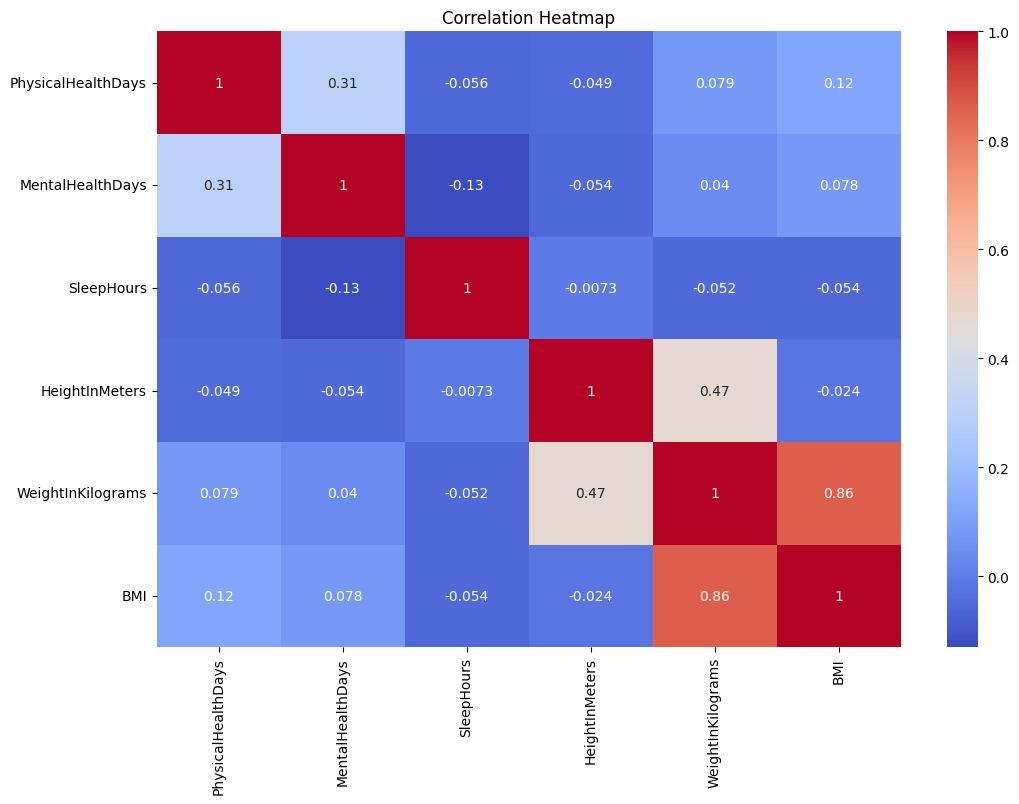

In [ ]:
# Correlation matrix for numerical columns
correlation_matrix = data_copy1[numerical_cols].corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
X = data_copy1.drop(columns=['HeartConditionBinary'])
y = data_copy1['HeartConditionBinary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
X_train.shape


(80000, 38)

In [ ]:
nominal_features = ['State', 'RaceEthnicityCategory', 'TetanusLast10Tdap', 'CovidPos','RemovedTeeth','SmokerStatus','ECigaretteUsage','HadDiabetes']
binary_features = [
     'HadStroke', 'HadAsthma', 'HadSkinCancer',
    'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
    'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating',
    'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands',
    'PhysicalActivities', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12',
    'PneumoVaxEver', 'HighRiskLastYear', 'ChestScan'
]
ordinal_features = ['GeneralHealth', 'LastCheckupTime', 'AgeCategory']

data_copy1['Sex'] = data_copy1['Sex'].replace({'Male':1,'Female':0})


<ipython-input-20-90263386828c>:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_copy1['Sex'] = data_copy1['Sex'].replace({'Male':1,'Female':0})


In [ ]:
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
nominal_encoded = pd.DataFrame(
    one_hot_encoder.fit_transform(data_copy1[nominal_features]),
    columns=one_hot_encoder.get_feature_names_out(nominal_features),
    index=data_copy1.index  # Align indices with the original DataFrame
)

binary_encoded = data_copy1[binary_features].replace({'Yes': 1, 'No': 0}).astype(int)


ordinal_mappings = {
    'GeneralHealth': ['Poor', 'Fair', 'Good', 'Very good', 'Excellent'],
    'LastCheckupTime': [
        '5 or more years ago',
        'Within past 5 years (2 years but less than 5 years ago)',
        'Within past 2 years (1 year but less than 2 years ago)',
        'Within past year (anytime less than 12 months ago)'
    ],
    'AgeCategory':[
        'Age 18 to 24', 'Age 25 to 29', 'Age 30 to 34', 'Age 35 to 39', 'Age 40 to 44', 'Age 45 to 49', 'Age 50 to 54', 'Age 55 to 59','Age 60 to 64', 'Age 65 to 69'
         ,'Age 70 to 74','Age 75 to 79','Age 80 or older'
    ]
}

ordinal_encoded = data_copy1[ordinal_features].replace({
    col: {val: i for i, val in enumerate(vals)} for col, vals in ordinal_mappings.items()
})

<ipython-input-21-2b01ca78c0a6>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  binary_encoded = data_copy1[binary_features].replace({'Yes': 1, 'No': 0}).astype(int)
<ipython-input-21-2b01ca78c0a6>:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ordinal_encoded = data_copy1[ordinal_features].replace({


In [ ]:
processed_data1 = pd.concat([nominal_encoded, binary_encoded, ordinal_encoded,numerical_data], axis=1)
processed_data1['HeartConditionBinary'] = data_copy1['HeartConditionBinary'].values
processed_data1

,State_Alabama,State_Alaska,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,State_Delaware,State_District of Columbia,State_Florida,...,GeneralHealth,LastCheckupTime,AgeCategory,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI,HeartConditionBinary
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,3,6,0.0,0.0,8.0,1.68,113.40,40.35,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,3,9,2.0,5.0,8.0,1.73,104.33,34.97,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,3,1,7.0,10.0,6.0,1.73,104.33,34.97,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,3,8,20.0,10.0,8.0,1.68,127.01,45.19,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4,3,8,0.0,0.0,7.0,1.60,49.90,19.49,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,0,5,3.0,0.0,7.0,1.70,77.11,26.63,0
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,3,11,30.0,10.0,6.0,1.88,90.72,25.68,1
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,0,0,2.0,12.0,7.0,1.65,56.70,20.80,0
99998,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,3,7,0.0,0.0,7.0,1.91,106.59,29.37,0


In [ ]:
# Check if indices match between the original target and processed data
print(data_copy1['HeartConditionBinary'].index.equals(processed_data1.index))  # Should return True

# Ensure no missing values in the target column
print(processed_data1['HeartConditionBinary'].isnull().sum())

True
0


In [ ]:
from sklearn.ensemble import IsolationForest

# Initializing and training the Isolation Forest model
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outliers = iso_forest.fit_predict(processed_data1)

# Adding the 'Outlier' column to the DataFrame
processed_data1['Outlier'] = outliers

# Calculating the percentage of outliers detected
total_samples = len(processed_data1)
outlier_count = (processed_data1['Outlier'] == -1).sum()
outlier_percentage = (outlier_count / total_samples) * 100

# Display the percentage of outliers detected
print(f"Total Samples: {total_samples}")
print(f"Number of Outliers Detected: {outlier_count}")
print(f"Percentage of Outliers Detected: {outlier_percentage:.2f}%")

Total Samples: 100000
Number of Outliers Detected: 5000
Percentage of Outliers Detected: 5.00%


In [ ]:
X = processed_data1.drop(columns=['HeartConditionBinary'])
y = processed_data1['HeartConditionBinary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

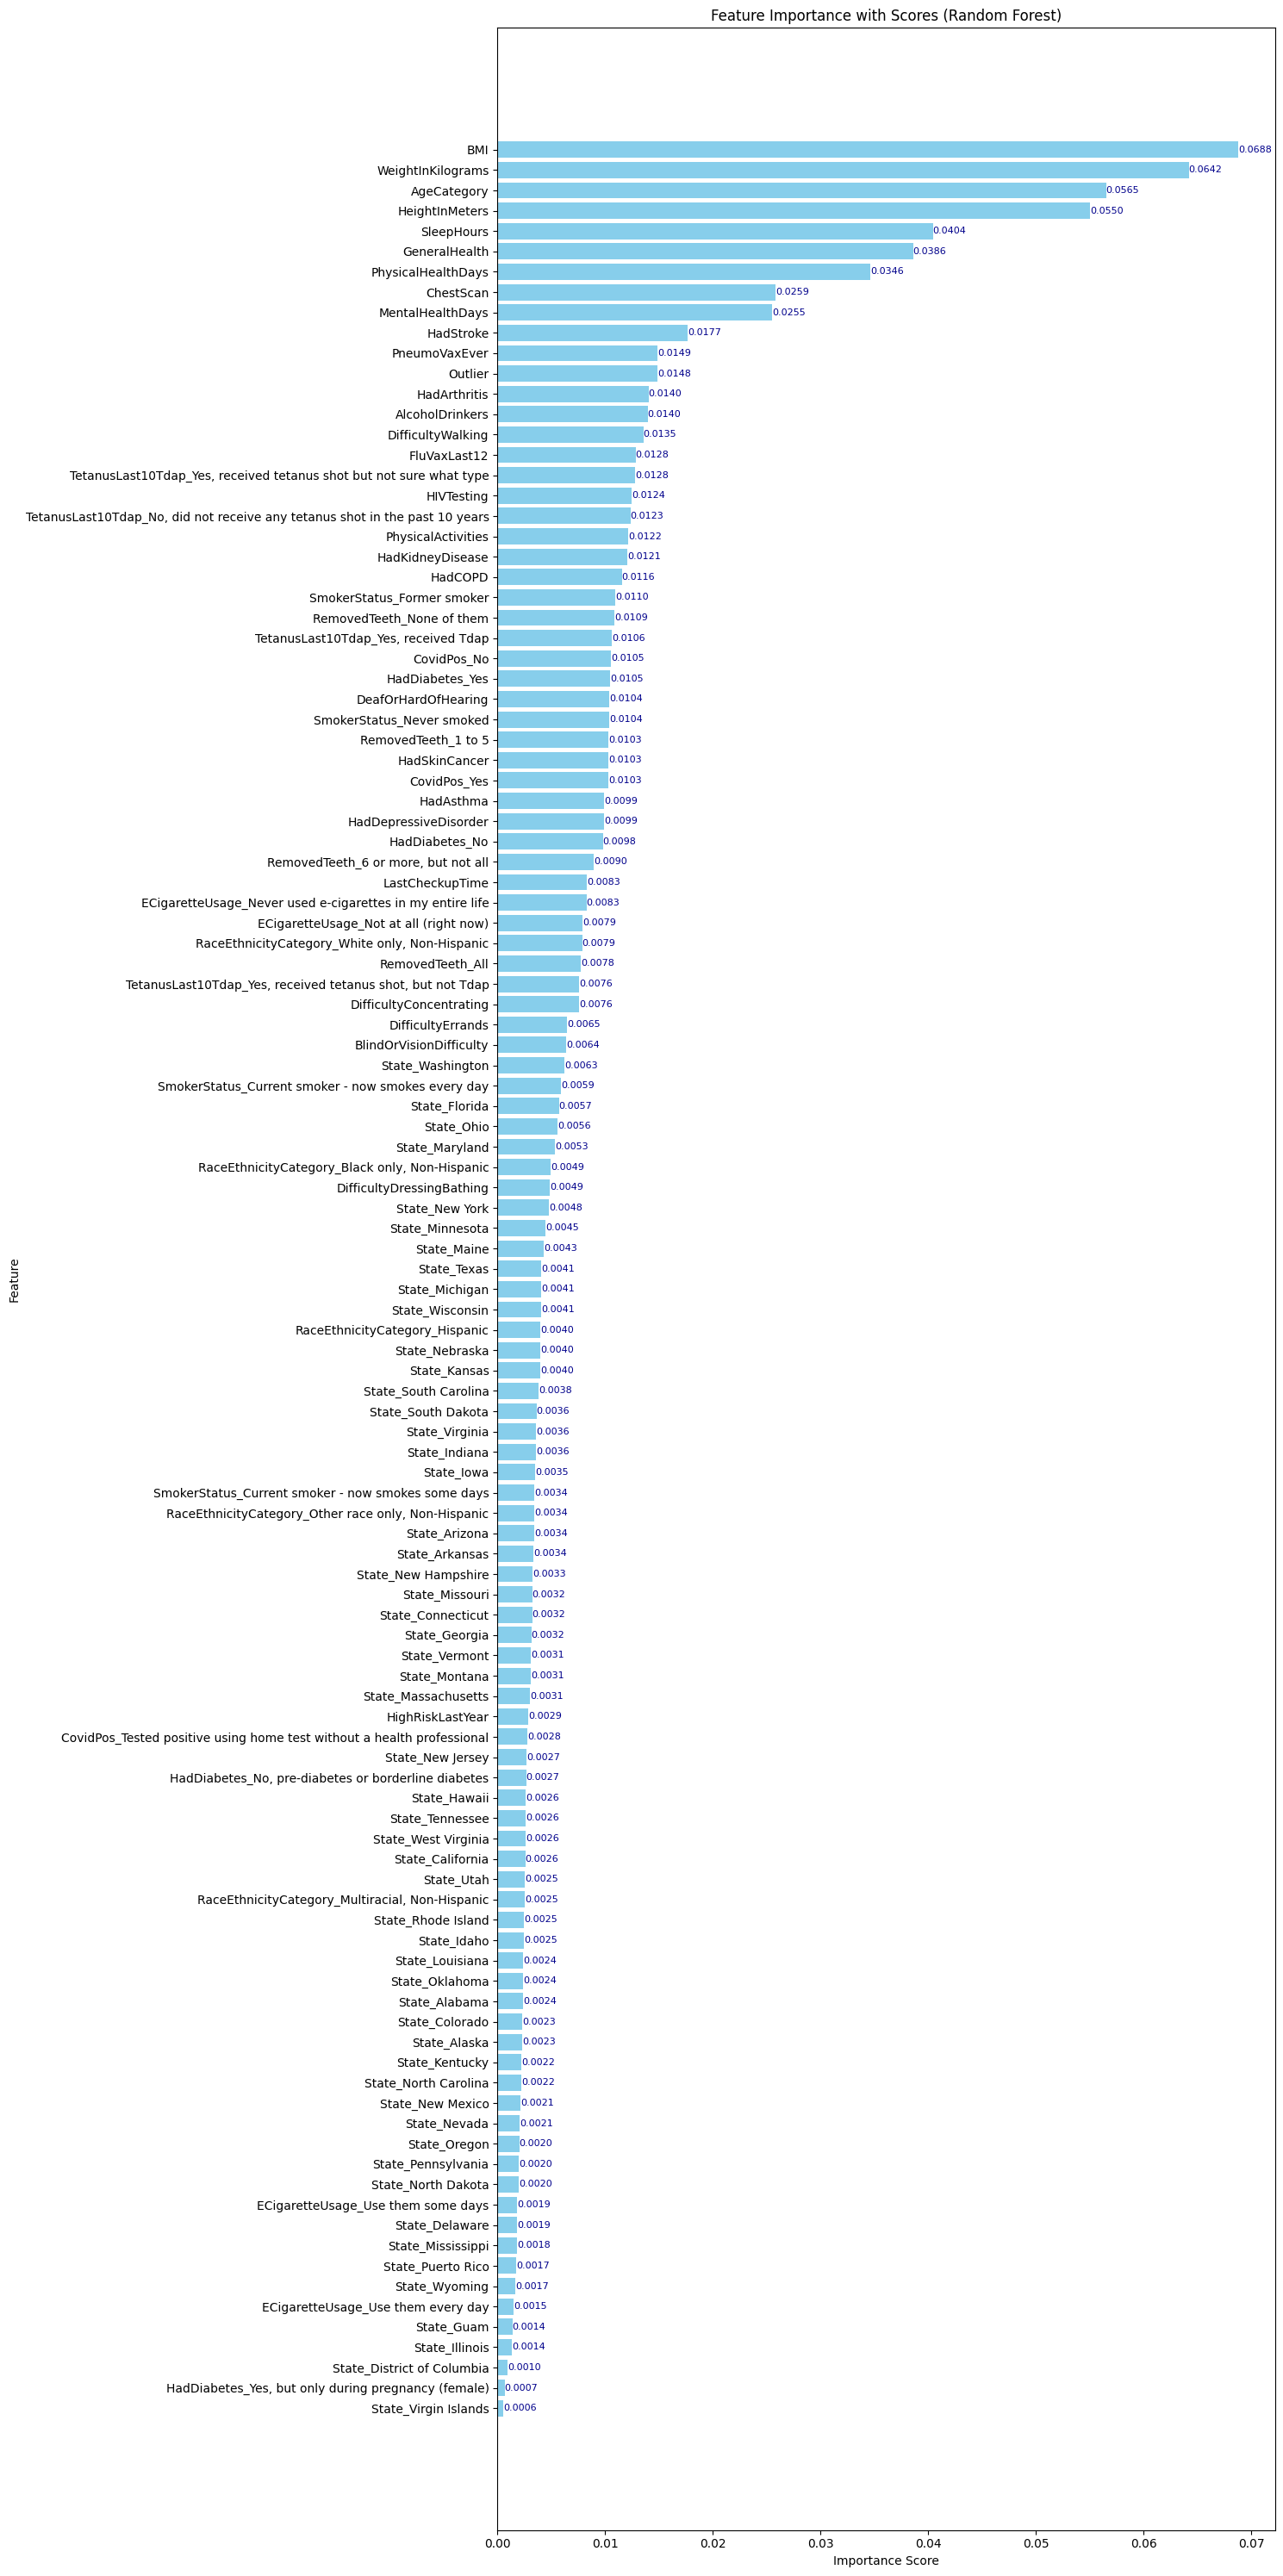

In [ ]:
# Train a Random Forest model
model = RandomForestClassifier(random_state=10)
model.fit(X_train, y_train)

# Get feature importance
feature_importance_rf = pd.DataFrame({'Feature': X_train.columns, 'Importance': model.feature_importances_})

# Sort by feature importance
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)

# Plot the bar chart
plt.figure(figsize=(15, 30))
plt.barh(feature_importance_rf['Feature'], feature_importance_rf['Importance'], color='skyblue')

# Annotate the bar chart with feature scores
for i, (importance, feature) in enumerate(zip(feature_importance_rf['Importance'], feature_importance_rf['Feature'])):
    plt.text(importance, i, f'{importance:.4f}', va='center', ha='left', fontsize=8, color='darkblue')

# Formatting
plt.gca().invert_yaxis()
plt.title('Feature Importance with Scores (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()

# Save the plot as an image
plt.savefig('feature_importance_with_scores.png', dpi=300)
plt.show()

#ML Models


In [ ]:
scaler = StandardScaler()

# Fit on training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=10),
    "Random Forest": RandomForestClassifier(random_state=10),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=10),
    "LightGBM": LGBMClassifier(random_state=10),
    "Naive Bayes": GaussianNB()
}

Training Logistic Regression...

Logistic Regression - Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     18239
           1       0.59      0.13      0.21      1761

    accuracy                           0.92     20000
   macro avg       0.76      0.56      0.58     20000
weighted avg       0.89      0.92      0.89     20000


Logistic Regression - Confusion Matrix (Test Set):
[[18086   153]
 [ 1540   221]]
Training Random Forest...

Random Forest - Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.92      1.00      0.95     18239
           1       0.64      0.04      0.08      1761

    accuracy                           0.91     20000
   macro avg       0.78      0.52      0.52     20000
weighted avg       0.89      0.91      0.88     20000


Random Forest - Confusion Matrix (Test Set):
[[18195    44]
 [ 1682    79]]
Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:22:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost - Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     18239
           1       0.55      0.14      0.22      1761

    accuracy                           0.91     20000
   macro avg       0.74      0.56      0.59     20000
weighted avg       0.89      0.91      0.89     20000


XGBoost - Confusion Matrix (Test Set):
[[18041   198]
 [ 1519   242]]
Training LightGBM...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 6948, number of negative: 73052
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.055102 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 994
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 112
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.086850 -> initscore=-2.352718
[LightGBM] [Info] Start training from score -2.352718


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



LightGBM - Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     18239
           1       0.60      0.10      0.17      1761

    accuracy                           0.91     20000
   macro avg       0.76      0.55      0.56     20000
weighted avg       0.89      0.91      0.89     20000


LightGBM - Confusion Matrix (Test Set):
[[18120   119]
 [ 1583   178]]
Training Naive Bayes...

Naive Bayes - Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.95      0.78      0.86     18239
           1       0.21      0.62      0.32      1761

    accuracy                           0.77     20000
   macro avg       0.58      0.70      0.59     20000
weighted avg       0.89      0.77      0.81     20000


Naive Bayes - Confusion Matrix (Test Set):
[[14277  3962]
 [  677  1084]]

Model Performance:
                 Model  Train Accuracy  Test Accuracy   AUC-

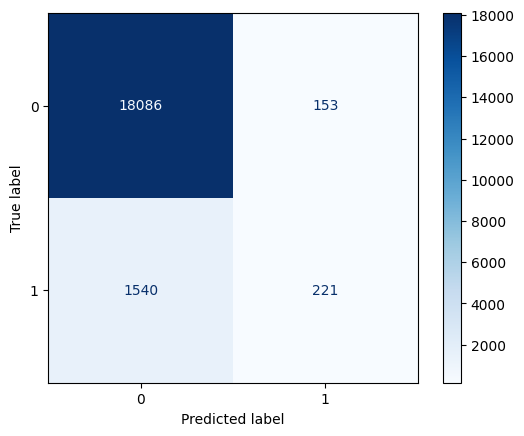

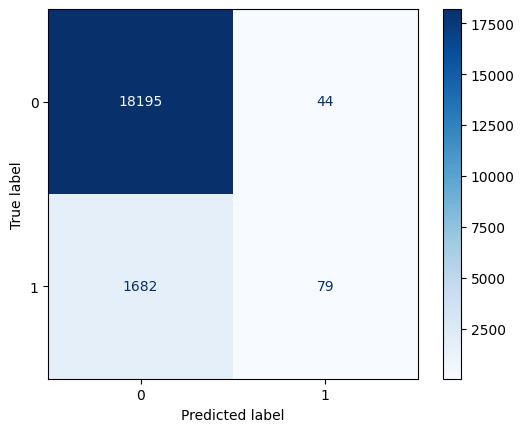

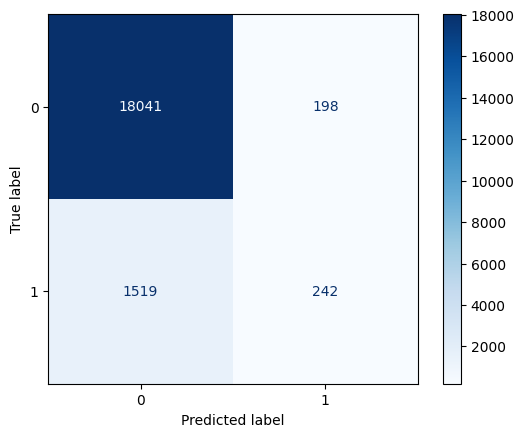

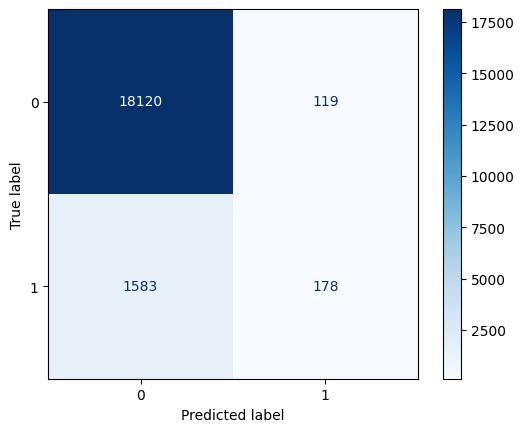

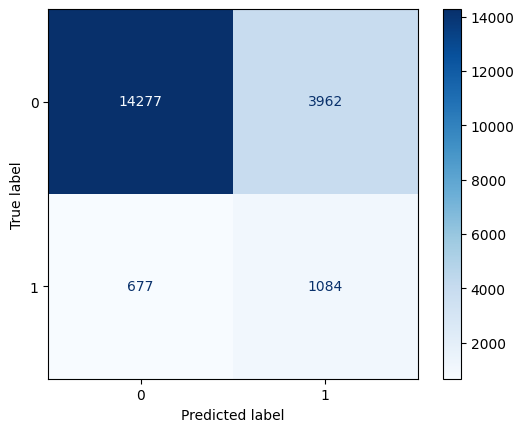

<Figure size 1000x600 with 0 Axes>

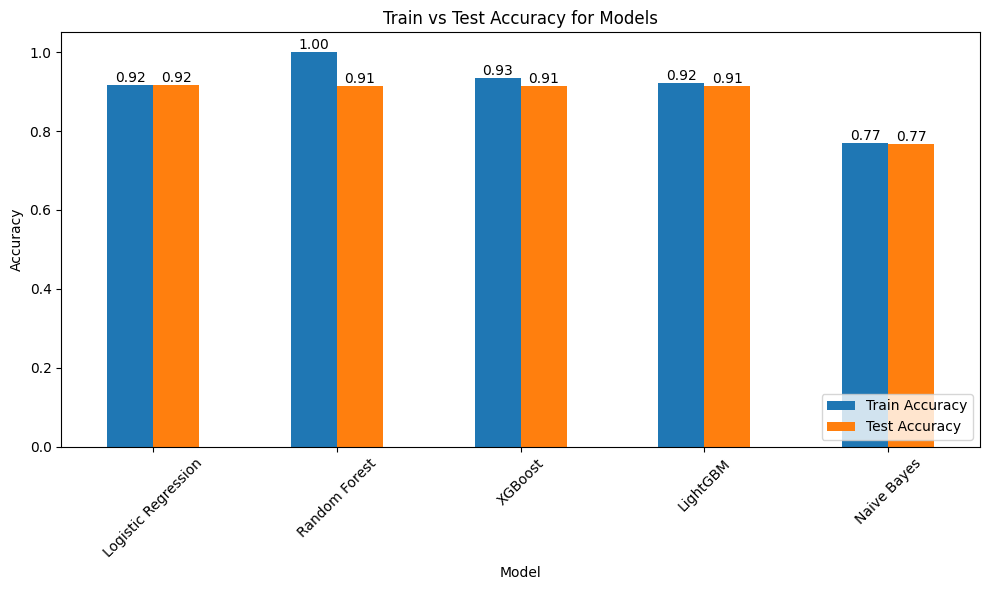

In [ ]:
results = []

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")

    # Train the model
    model.fit(X_train_scaled, y_train)

    # Predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # AUC-ROC for binary classification
    auc_roc = None
    if len(set(y_test)) == 2:  # Check if binary classification
        y_test_prob = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None
        if y_test_prob is not None:
            auc_roc = roc_auc_score(y_test, y_test_prob)

    # Classification metrics
    classification_metrics = classification_report(
        y_test, y_test_pred, output_dict=True, target_names=["Class 0", "Class 1"]
    )
    f1_score_class_0 = classification_metrics["Class 0"]["f1-score"]
    f1_score_class_1 = classification_metrics["Class 1"]["f1-score"]
    recall_class_0 = classification_metrics["Class 0"]["recall"]
    recall_class_1 = classification_metrics["Class 1"]["recall"]

    # Store results
    results.append({
        "Model": name,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "AUC-ROC": auc_roc,
        "F1-Score (Class 0)": f1_score_class_0,
        "F1-Score (Class 1)": f1_score_class_1,
        "Recall (Class 0)": recall_class_0,
        "Recall (Class 1)": recall_class_1
    })

    # Print classification report
    print(f"\n{name} - Classification Report (Test Set):")
    print(classification_report(y_test, y_test_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    print(f"\n{name} - Confusion Matrix (Test Set):")
    print(cm)
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot(cmap='Blues')

# Create a DataFrame for results
results_df = pd.DataFrame(results)

# Display results
print("\nModel Performance:")
print(results_df)

# Plotting train and test accuracy with values
plt.figure(figsize=(10, 6))
ax = results_df.set_index('Model')[['Train Accuracy', 'Test Accuracy']].plot(kind='bar', figsize=(10, 6))

# Annotating the bars with respective values
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')  # Display values up to 2 decimal points

plt.title("Train vs Test Accuracy for Models")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

#CSL

In [ ]:
# Imbalance Ratio(IR) = Nmj/Nmin

Nmaj = class_counts[0]  # Count for class '0'
Nmin = class_counts[1]  # Count for class '1'

# Compute Imbalance Ratio (IR)
IR = Nmaj / Nmin

print(f"Majority Class (Nmaj): {Nmaj}")
print(f"Minority Class (Nmin): {Nmin}")
print(f"Imbalance Ratio (IR): {IR:.2f}")

Majority Class (Nmaj): 91291
Minority Class (Nmin): 8709
Imbalance Ratio (IR): 10.48


Training Logistic Regression...

Logistic Regression - Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.97      0.75      0.84     18239
           1       0.23      0.78      0.35      1761

    accuracy                           0.75     20000
   macro avg       0.60      0.76      0.60     20000
weighted avg       0.91      0.75      0.80     20000


Logistic Regression - Confusion Matrix (Test Set):
[[13602  4637]
 [  385  1376]]
Training Random Forest...

Random Forest - Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.97      0.76      0.85     18239
           1       0.23      0.76      0.36      1761

    accuracy                           0.76     20000
   macro avg       0.60      0.76      0.60     20000
weighted avg       0.91      0.76      0.81     20000


Random Forest - Confusion Matrix (Test Set):
[[13834  4405]
 [  418  1343]]
Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:23:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost - Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.96      0.79      0.87     18239
           1       0.24      0.67      0.35      1761

    accuracy                           0.78     20000
   macro avg       0.60      0.73      0.61     20000
weighted avg       0.90      0.78      0.82     20000


XGBoost - Confusion Matrix (Test Set):
[[14458  3781]
 [  573  1188]]
Training LightGBM...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 6948, number of negative: 73052
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.054825 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 994
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 112
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.086850 -> initscore=-2.352718
[LightGBM] [Info] Start training from score -2.352718


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



LightGBM - Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.97      0.74      0.84     18239
           1       0.23      0.79      0.35      1761

    accuracy                           0.74     20000
   macro avg       0.60      0.76      0.60     20000
weighted avg       0.91      0.74      0.80     20000


LightGBM - Confusion Matrix (Test Set):
[[13509  4730]
 [  378  1383]]
Training Naive Bayes...

Naive Bayes - Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.95      0.78      0.86     18239
           1       0.21      0.62      0.32      1761

    accuracy                           0.77     20000
   macro avg       0.58      0.70      0.59     20000
weighted avg       0.89      0.77      0.81     20000


Naive Bayes - Confusion Matrix (Test Set):
[[14277  3962]
 [  677  1084]]

Model Performance:
                 Model  Train Accuracy  Test Accuracy   AUC-

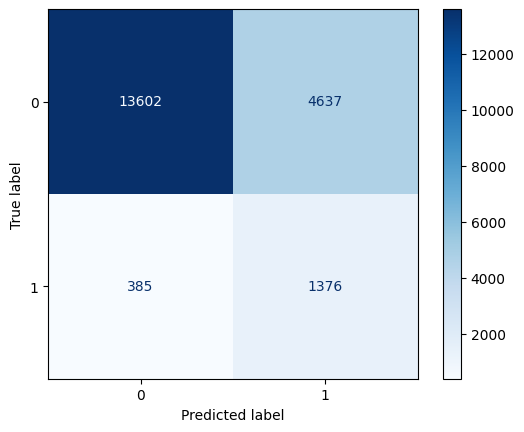

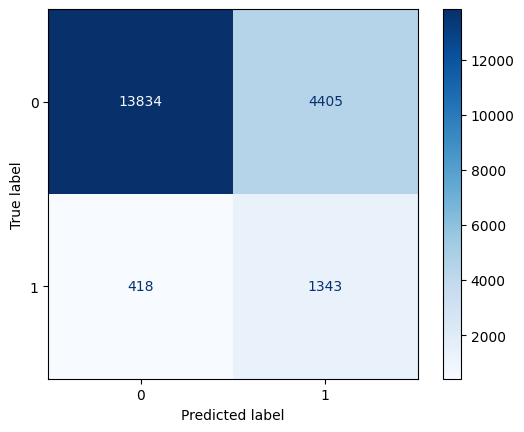

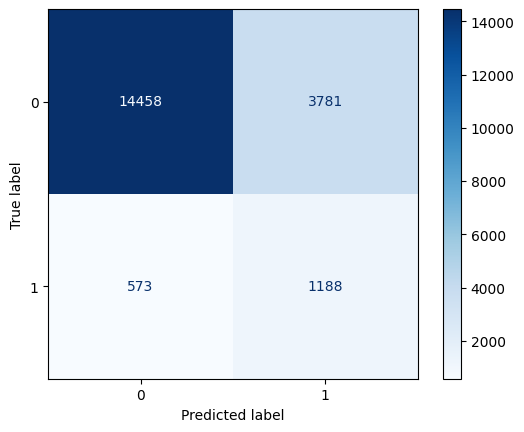

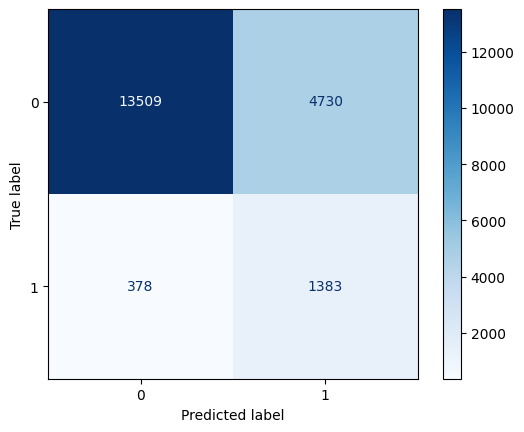

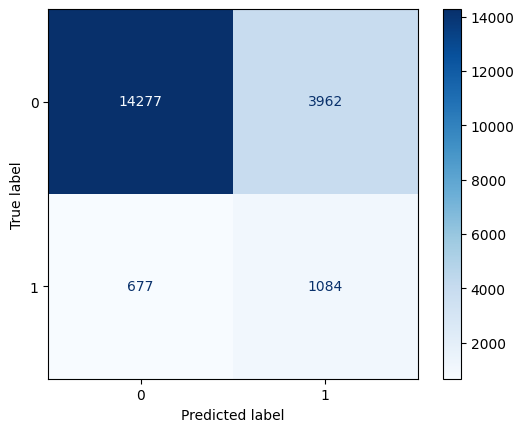

<Figure size 1000x600 with 0 Axes>

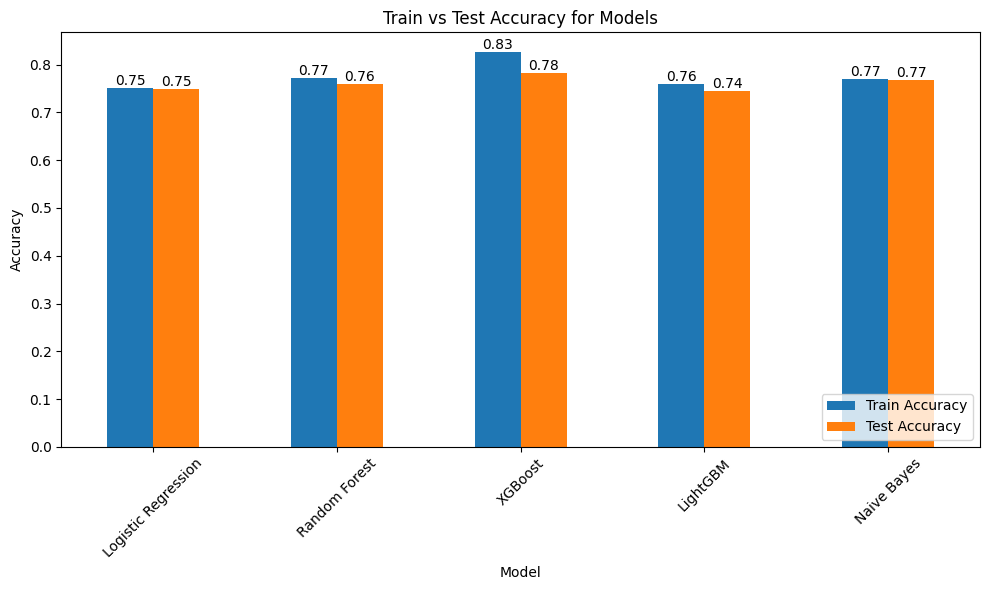

In [ ]:
# Define class weights for models that support it
class_weights = {0: 1, 1: IR}  # Logistic Regression and Random Forest

# Define weighted models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=10, class_weight=class_weights),
    "Random Forest": RandomForestClassifier(random_state=10, class_weight=class_weights,max_depth=10, n_estimators=130),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=IR, random_state=10),
    "LightGBM": LGBMClassifier(scale_pos_weight=IR, random_state=10),
    "Naive Bayes": GaussianNB()  # Naive Bayes doesn't use IR directly
}

results = []

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")

    # Train the model
    model.fit(X_train_scaled, y_train)

    # Predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # AUC-ROC for binary classification
    auc_roc = None
    if len(set(y_test)) == 2:  # Check if binary classification
        y_test_prob = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None
        if y_test_prob is not None:
            auc_roc = roc_auc_score(y_test, y_test_prob)

    # Classification metrics
    classification_metrics = classification_report(
        y_test, y_test_pred, output_dict=True, target_names=["Class 0", "Class 1"]
    )
    f1_score_class_0 = classification_metrics["Class 0"]["f1-score"]
    f1_score_class_1 = classification_metrics["Class 1"]["f1-score"]
    recall_class_0 = classification_metrics["Class 0"]["recall"]
    recall_class_1 = classification_metrics["Class 1"]["recall"]

    # Store results
    results.append({
        "Model": name,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "AUC-ROC": auc_roc,
        "F1-Score (Class 0)": f1_score_class_0,
        "F1-Score (Class 1)": f1_score_class_1,
        "Recall (Class 0)": recall_class_0,
        "Recall (Class 1)": recall_class_1
    })

    # Print classification report
    print(f"\n{name} - Classification Report (Test Set):")
    print(classification_report(y_test, y_test_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    print(f"\n{name} - Confusion Matrix (Test Set):")
    print(cm)
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot(cmap='Blues')

# Create a DataFrame for results
results_df = pd.DataFrame(results)

# Display results
print("\nModel Performance:")
print(results_df)

# Plotting train and test accuracy with values
plt.figure(figsize=(10, 6))
ax = results_df.set_index('Model')[['Train Accuracy', 'Test Accuracy']].plot(kind='bar', figsize=(10, 6))

# Annotating the bars with respective values
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')  # Display values up to 2 decimal points

plt.title("Train vs Test Accuracy for Models")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

Training Logistic Regression...

Logistic Regression - Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.97      0.75      0.84     18239
           1       0.23      0.78      0.35      1761

    accuracy                           0.75     20000
   macro avg       0.60      0.76      0.60     20000
weighted avg       0.91      0.75      0.80     20000


Logistic Regression - Confusion Matrix (Test Set):
[[13599  4640]
 [  385  1376]]
Training Random Forest...

Random Forest - Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.97      0.76      0.85     18239
           1       0.23      0.76      0.36      1761

    accuracy                           0.76     20000
   macro avg       0.60      0.76      0.61     20000
weighted avg       0.91      0.76      0.81     20000


Random Forest - Confusion Matrix (Test Set):
[[13864  4375]
 [  420  1341]]
Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:23:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost - Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.96      0.79      0.87     18239
           1       0.24      0.67      0.35      1761

    accuracy                           0.78     20000
   macro avg       0.60      0.73      0.61     20000
weighted avg       0.90      0.78      0.82     20000


XGBoost - Confusion Matrix (Test Set):
[[14458  3781]
 [  573  1188]]
Training LightGBM...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 6948, number of negative: 73052
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.089258 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 994
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 112
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.086850 -> initscore=-2.352718
[LightGBM] [Info] Start training from score -2.352718


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



LightGBM - Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     18239
           1       1.00      0.01      0.01      1761

    accuracy                           0.91     20000
   macro avg       0.96      0.50      0.48     20000
weighted avg       0.92      0.91      0.87     20000


LightGBM - Confusion Matrix (Test Set):
[[18239     0]
 [ 1752     9]]
Training Naive Bayes...

Naive Bayes - Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.95      0.78      0.86     18239
           1       0.21      0.62      0.32      1761

    accuracy                           0.77     20000
   macro avg       0.58      0.70      0.59     20000
weighted avg       0.89      0.77      0.81     20000


Naive Bayes - Confusion Matrix (Test Set):
[[14277  3962]
 [  677  1084]]

Model Performance:
                 Model  Train Accuracy  Test Accuracy   AUC-

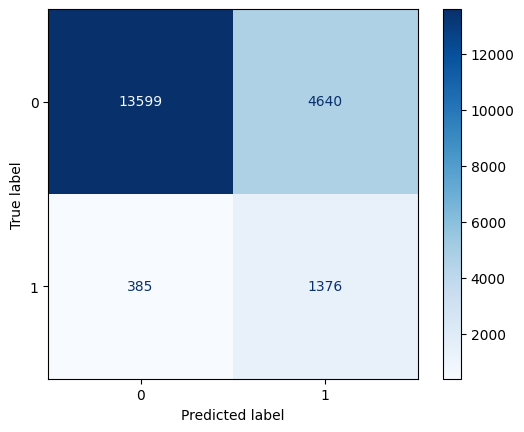

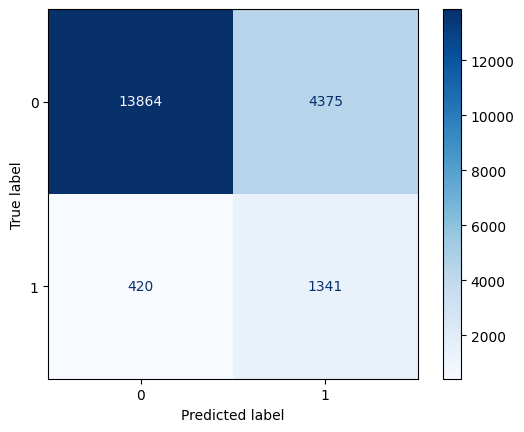

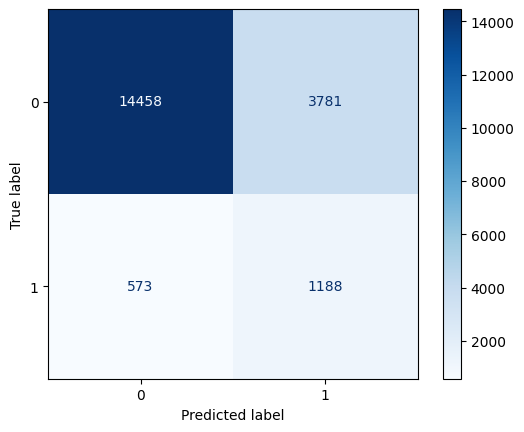

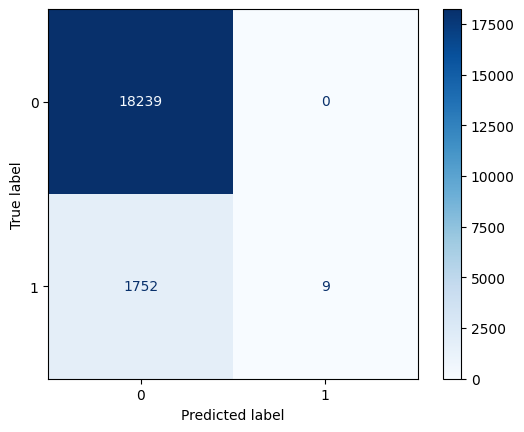

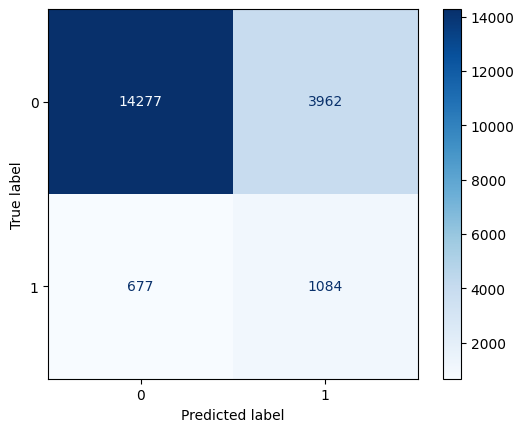

<Figure size 1000x600 with 0 Axes>

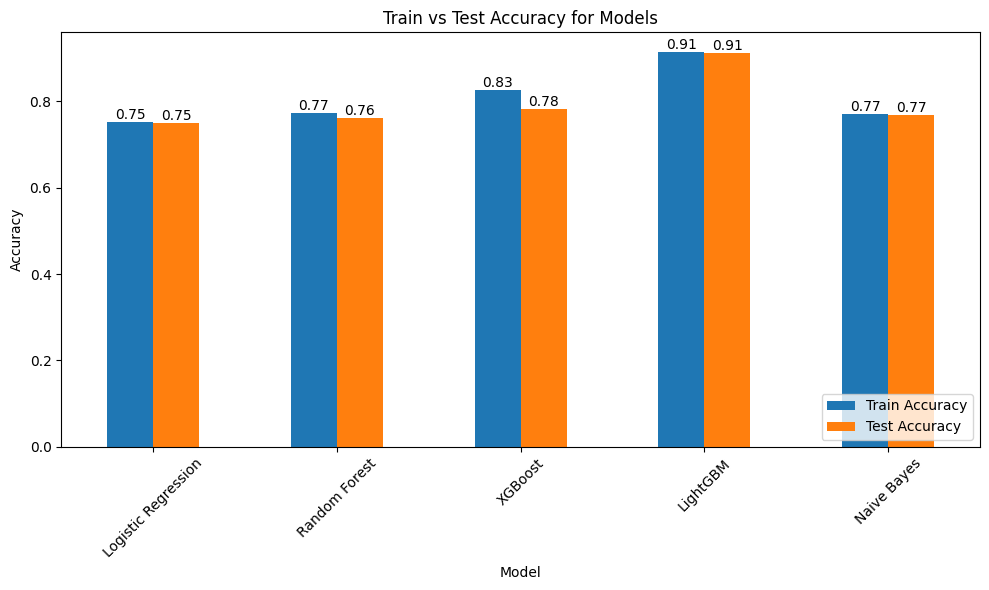

In [ ]:
# Define class weights for models that support it
class_weights2 = {1: 1, 0: (1/IR)}  # Logistic Regression and Random Forest

# Define weighted models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=10, class_weight=class_weights2),
    "Random Forest": RandomForestClassifier(random_state=10, class_weight=class_weights2,max_depth=10, n_estimators=130),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=IR, random_state=10),
    "LightGBM": LGBMClassifier(scale_pos_weight=1/IR, random_state=10),
    "Naive Bayes": GaussianNB()  # Naive Bayes doesn't use IR directly
}

# Train and evaluate each model
results = []

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")

    # Train the model
    model.fit(X_train_scaled, y_train)

    # Predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # AUC-ROC for binary classification
    auc_roc = None
    if len(set(y_test)) == 2:  # Check if binary classification
        y_test_prob = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None
        if y_test_prob is not None:
            auc_roc = roc_auc_score(y_test, y_test_prob)

    # Classification metrics
    classification_metrics = classification_report(
        y_test, y_test_pred, output_dict=True, target_names=["Class 0", "Class 1"]
    )
    f1_score_class_0 = classification_metrics["Class 0"]["f1-score"]
    f1_score_class_1 = classification_metrics["Class 1"]["f1-score"]
    recall_class_0 = classification_metrics["Class 0"]["recall"]
    recall_class_1 = classification_metrics["Class 1"]["recall"]

    # Store results
    results.append({
        "Model": name,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "AUC-ROC": auc_roc,
        "F1-Score (Class 0)": f1_score_class_0,
        "F1-Score (Class 1)": f1_score_class_1,
        "Recall (Class 0)": recall_class_0,
        "Recall (Class 1)": recall_class_1
    })

    # Print classification report
    print(f"\n{name} - Classification Report (Test Set):")
    print(classification_report(y_test, y_test_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    print(f"\n{name} - Confusion Matrix (Test Set):")
    print(cm)
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot(cmap='Blues')

# Create a DataFrame for results
results_df = pd.DataFrame(results)

# Display results
print("\nModel Performance:")
print(results_df)

# Plotting train and test accuracy with values
plt.figure(figsize=(10, 6))
ax = results_df.set_index('Model')[['Train Accuracy', 'Test Accuracy']].plot(kind='bar', figsize=(10, 6))

# Annotating the bars with respective values
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')  # Display values up to 2 decimal points

plt.title("Train vs Test Accuracy for Models")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

In [ ]:
!pip install imbalanced-ensemble
import imbens
from imbens.ensemble.base import sort_dict_by_key

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 744.6/744.6 kB 23.0 MB/s eta 0:00:00


In [ ]:
cost_matrices = {}

def plot_cost_matrix(cost_matrix, title: str, **kwargs):
    ax = sns.heatmap(data=cost_matrix, **kwargs)
    ax.set_ylabel("Predicted Label")
    ax.set_xlabel("Ground Truth")
    ax.set_title(title)

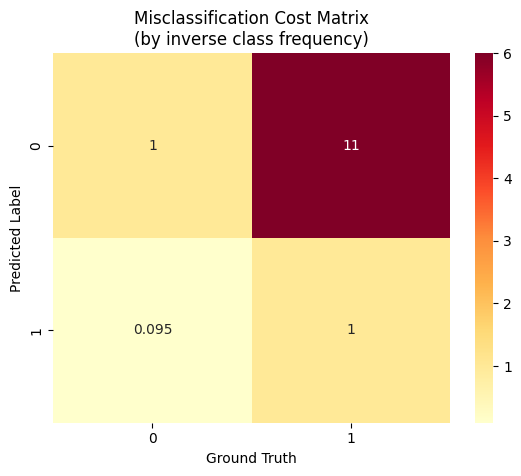

In [ ]:
# Default Cost Matrix

'''init_kwargs = {
    "n_estimators": 50,
    "learning_rate": 1.0,
    "random_state": 10,
}'''

adacost_clf = imbens.ensemble.AdaCostClassifier()
adacost_clf.fit(X_train_scaled, y_train)

cost_matrix1 = adacost_clf.cost_matrix_

title = "Misclassification Cost Matrix\n(by inverse class frequency)"
cost_matrices[title] = adacost_clf.cost_matrix_
plot_cost_matrix(adacost_clf.cost_matrix_, title, annot=True, cmap='YlOrRd', vmax=6)

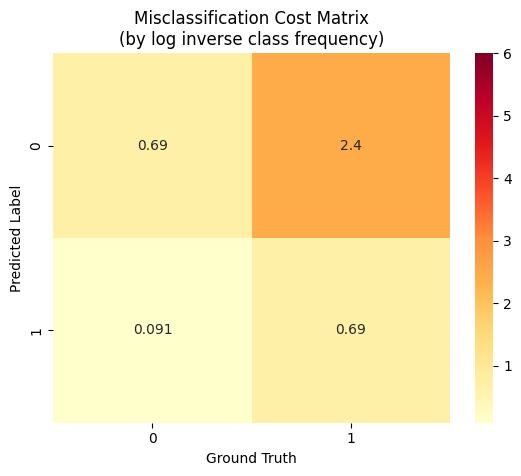

In [ ]:
# log1p-inverse Cost Matrix
adacost_clf.fit(
    X_train_scaled,
    y_train,
    cost_matrix='log1p-inverse',  # set cost matrix by log inverse class frequency
)

cost_matrix2 =adacost_clf.cost_matrix_


title = "Misclassification Cost Matrix\n(by log inverse class frequency)"
cost_matrices[title] = adacost_clf.cost_matrix_
plot_cost_matrix(adacost_clf.cost_matrix_, title, annot=True, cmap='YlOrRd', vmax=6)

In [ ]:
cost_matrix1

array([[ 1.        , 10.51410478],
       [ 0.09511033,  1.        ]])

In [ ]:
cost_matrix2

array([[0.69314718, 2.44357279],
       [0.09085512, 0.69314718]])

In [ ]:
0.09085512 /(0.09085512+2.44357279)

0.03584837416030507

In [ ]:
0.09511033/(10.51410478+0.09511033)

0.00896487902392998

In [ ]:
#  w0 = c0/ (c1+c0)
#  w1 = c1 /(c1+c0)
# These weights are proportional to the misclassification costs and sum to 1, ensuring that higher misclassification costs lead to higher corresponding class weights

class_weights_licf = {0:0.03584837416030507, 1:0.9641516258396949}
class_weights_icf = {0:0.00896487902392998, 1:0.9910351209760699}


Training Logistic Regression...

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.26      0.41     18239
           1       0.11      0.99      0.20      1761

    accuracy                           0.32     20000
   macro avg       0.55      0.62      0.31     20000
weighted avg       0.92      0.32      0.39     20000


Logistic Regression - Confusion Matrix:


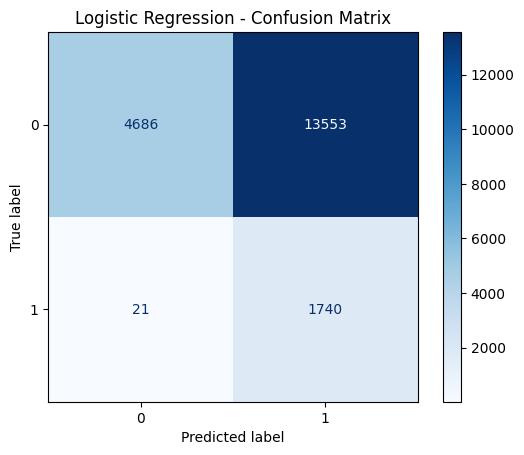


Training Random Forest...

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.24      0.39     18239
           1       0.11      0.99      0.20      1761

    accuracy                           0.31     20000
   macro avg       0.55      0.61      0.30     20000
weighted avg       0.92      0.31      0.37     20000


Random Forest - Confusion Matrix:


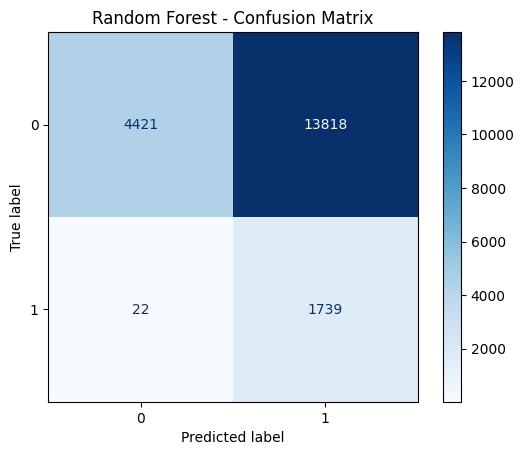


Training XGBoost...

XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.51      0.67     18239
           1       0.15      0.88      0.26      1761

    accuracy                           0.55     20000
   macro avg       0.56      0.70      0.47     20000
weighted avg       0.91      0.55      0.64     20000


XGBoost - Confusion Matrix:


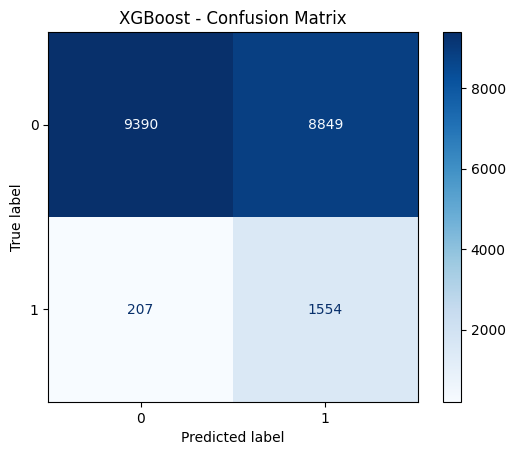


Training LightGBM...
[LightGBM] [Info] Number of positive: 6948, number of negative: 73052
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.053109 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 994
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 112
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.086850 -> initscore=-2.352718
[LightGBM] [Info] Start training from score -2.352718

LightGBM - Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.41      0.58     18239
           1       0.14      0.96      0.24      1761

    accuracy                           0.46     20000
   macro avg       0.56      0.69      0.41     20000
weighted avg       0.92      0.46      0.55     20000


LightGBM - Confusion Matrix:


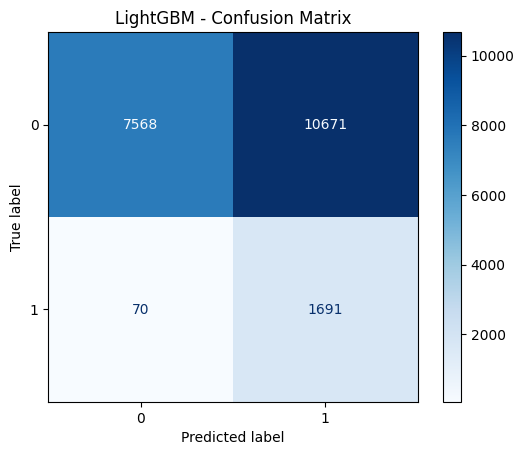


Training Naive Bayes...

Naive Bayes - Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.69      0.80     18239
           1       0.19      0.73      0.30      1761

    accuracy                           0.69     20000
   macro avg       0.57      0.71      0.55     20000
weighted avg       0.90      0.69      0.76     20000


Naive Bayes - Confusion Matrix:


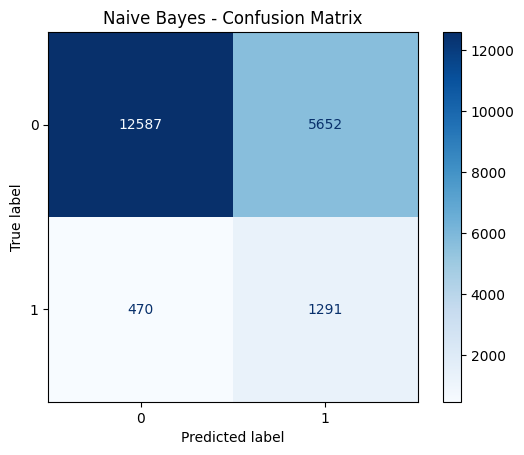


Weighted Results:
                 Model  Train Accuracy  Test Accuracy   AUC-ROC  \
0  Logistic Regression        0.320975        0.32130  0.840667   
1        Random Forest        0.310900        0.30800  0.811761   
2              XGBoost        0.575875        0.54720  0.797856   
3             LightGBM        0.468775        0.46295  0.832703   
4          Naive Bayes        0.693850        0.69390  0.776414   

   F1-Score (Class 0)  F1-Score (Class 1)  Recall (Class 0)  Recall (Class 1)  
0            0.408437            0.204058          0.256922          0.988075  
1            0.389825            0.200832          0.242393          0.987507  
2            0.674666            0.255508          0.514831          0.882453  
3            0.584921            0.239468          0.414935          0.960250  
4            0.804384            0.296645          0.690115          0.733106  


<Figure size 1000x600 with 0 Axes>

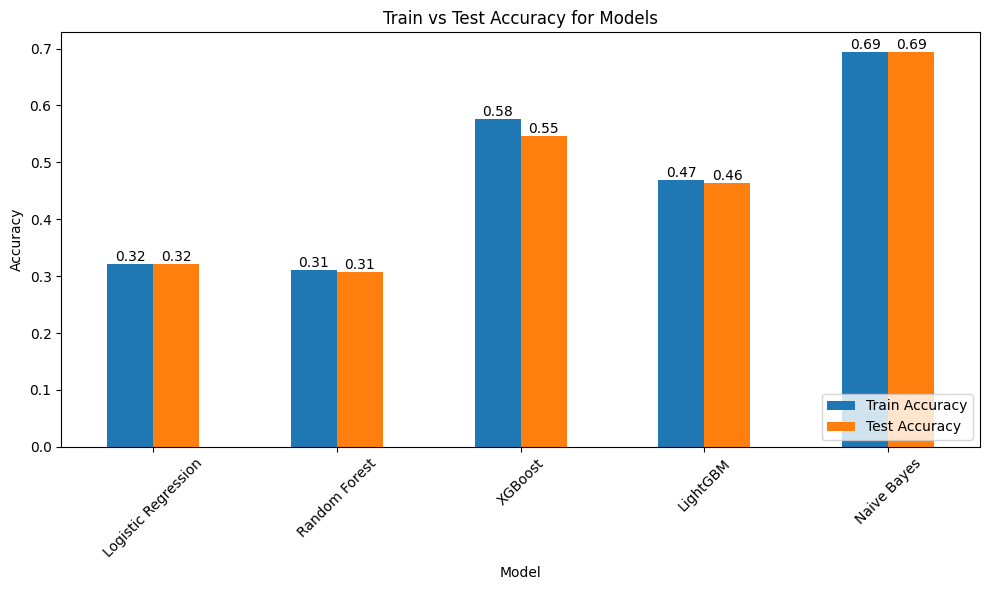

In [ ]:
IR1 = 10.51410478 / 0.09511033

# Define weighted models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=10, class_weight=class_weights_icf),
    "Random Forest": RandomForestClassifier(random_state=10, class_weight=class_weights_icf, max_depth=10, n_estimators=130),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=IR1, random_state=10),
    "LightGBM": LGBMClassifier(scale_pos_weight=IR1, random_state=10),
    "Naive Bayes": GaussianNB()  # Naive Bayes doesn't use IR directly
}

# Train and evaluate each model
results = []
for name, model in models.items():
    print(f"\nTraining {name}...")

    # Train the model
    if name == "Naive Bayes":
        sample_weights = [class_weights_icf[y] for y in y_train]
        model.fit(X_train_scaled, y_train, sample_weight=sample_weights)
    else:
        model.fit(X_train_scaled, y_train)

    # Predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # AUC-ROC
    auc_roc = None
    if len(set(y_test)) == 2:
        y_test_prob = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None
        if y_test_prob is not None:
            auc_roc = roc_auc_score(y_test, y_test_prob)

    # Classification metrics
    classification_metrics = classification_report(
        y_test, y_test_pred, output_dict=True, target_names=["Class 0", "Class 1"]
    )
    f1_score_class_0 = classification_metrics["Class 0"]["f1-score"]
    f1_score_class_1 = classification_metrics["Class 1"]["f1-score"]
    recall_class_0 = classification_metrics["Class 0"]["recall"]
    recall_class_1 = classification_metrics["Class 1"]["recall"]

    # Store results
    results.append({
        "Model": name,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "AUC-ROC": auc_roc,
        "F1-Score (Class 0)": f1_score_class_0,
        "F1-Score (Class 1)": f1_score_class_1,
        "Recall (Class 0)": recall_class_0,
        "Recall (Class 1)": recall_class_1
    })

    # Print metrics
    print(f"\n{name} - Classification Report:")
    print(classification_report(y_test, y_test_pred))
    cm = confusion_matrix(y_test, y_test_pred)
    print(f"\n{name} - Confusion Matrix:")
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot(cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display results
print("\nWeighted Results:")
print(results_df)

# Plotting train and test accuracy with values
plt.figure(figsize=(10, 6))
ax = results_df.set_index('Model')[['Train Accuracy', 'Test Accuracy']].plot(kind='bar', figsize=(10, 6))

# Annotating the bars with respective values
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')  # Display values up to 2 decimal points

plt.title("Train vs Test Accuracy for Models")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


Training Logistic Regression...

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.55      0.71     18239
           1       0.16      0.92      0.28      1761

    accuracy                           0.58     20000
   macro avg       0.58      0.73      0.49     20000
weighted avg       0.91      0.58      0.67     20000


Logistic Regression - Confusion Matrix:


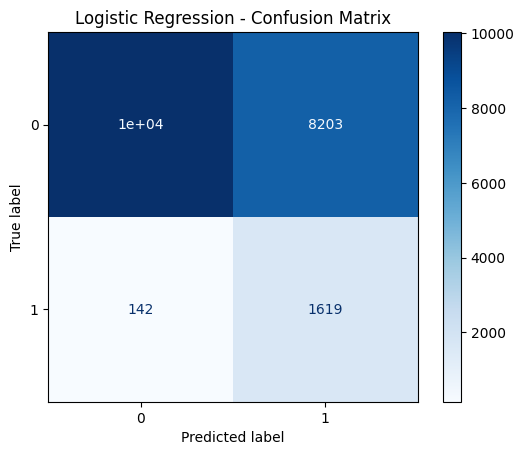


Training Random Forest...

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.53      0.69     18239
           1       0.16      0.92      0.27      1761

    accuracy                           0.57     20000
   macro avg       0.57      0.73      0.48     20000
weighted avg       0.91      0.57      0.65     20000


Random Forest - Confusion Matrix:


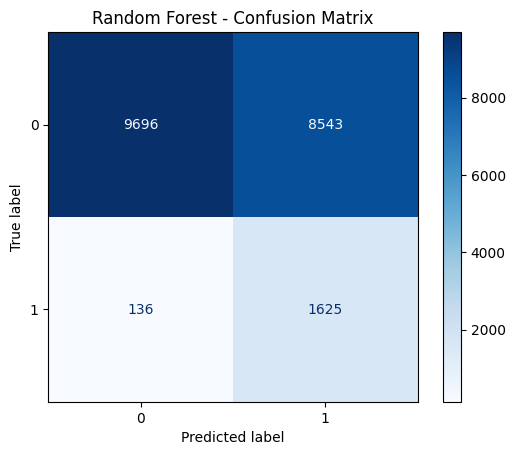


Training XGBoost...

XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.66      0.79     18239
           1       0.19      0.82      0.31      1761

    accuracy                           0.68     20000
   macro avg       0.58      0.74      0.55     20000
weighted avg       0.91      0.68      0.75     20000


XGBoost - Confusion Matrix:


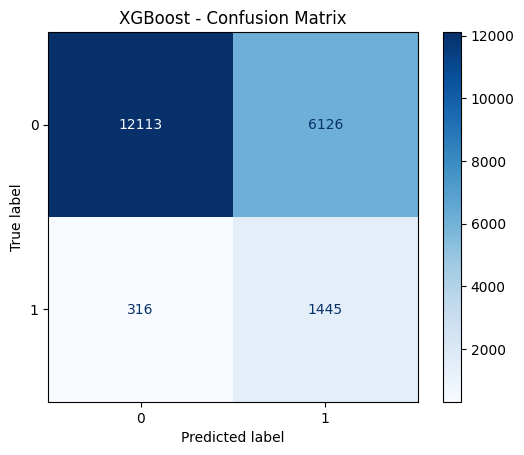


Training LightGBM...
[LightGBM] [Info] Number of positive: 6948, number of negative: 73052
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.053182 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 994
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 112
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.086850 -> initscore=-2.352718
[LightGBM] [Info] Start training from score -2.352718

LightGBM - Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.59      0.74     18239
           1       0.18      0.91      0.29      1761

    accuracy                           0.62     20000
   macro avg       0.58      0.75      0.51     20000
weighted avg       0.91      0.62      0.70     20000


LightGBM - Confusion Matrix:


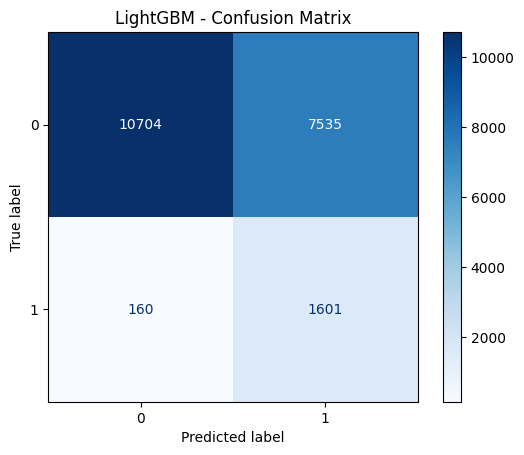


Training Naive Bayes...

Naive Bayes - Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.72      0.82     18239
           1       0.19      0.70      0.30      1761

    accuracy                           0.72     20000
   macro avg       0.58      0.71      0.56     20000
weighted avg       0.89      0.72      0.78     20000


Naive Bayes - Confusion Matrix:


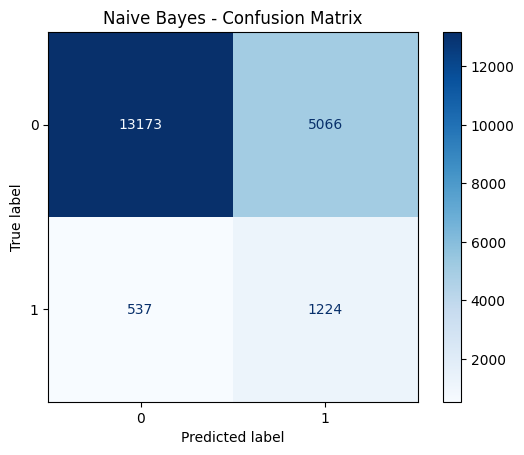


Weighted Results:
                 Model  Train Accuracy  Test Accuracy   AUC-ROC  \
0  Logistic Regression        0.583838        0.58275  0.841461   
1        Random Forest        0.573113        0.56605  0.829866   
2              XGBoost        0.711625        0.67790  0.814516   
3             LightGBM        0.623200        0.61525  0.841952   
4          Naive Bayes        0.720025        0.71985  0.776542   

   F1-Score (Class 0)  F1-Score (Class 1)  Recall (Class 0)  Recall (Class 1)  
0            0.706338            0.279548          0.550249          0.919364  
1            0.690820            0.272445          0.531608          0.922771  
2            0.789944            0.309687          0.664126          0.820557  
3            0.735594            0.293842          0.586874          0.909143  
4            0.824627            0.304062          0.722244          0.695060  


<Figure size 1000x600 with 0 Axes>

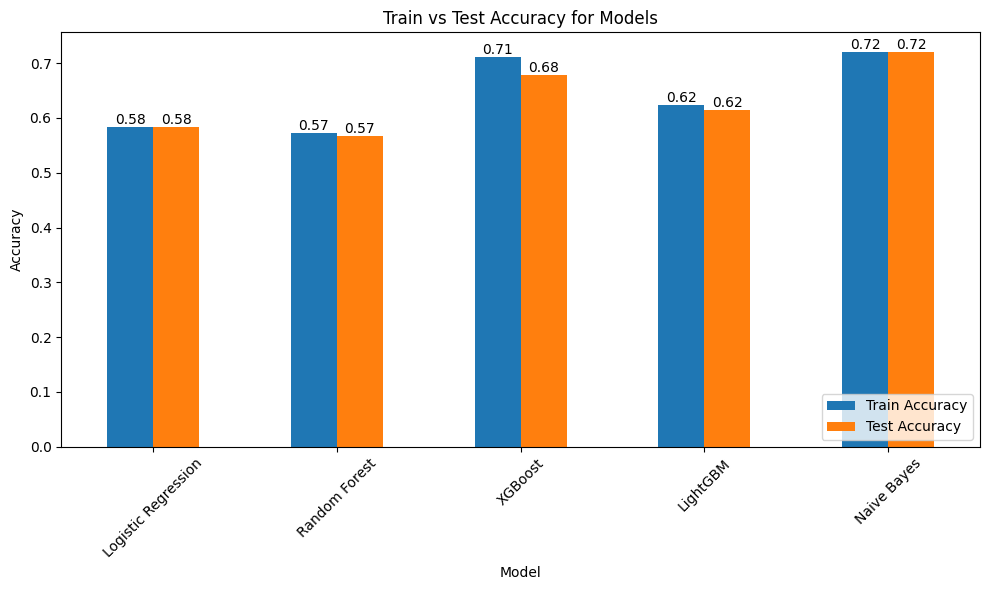

In [ ]:
IR2 = 2.44357279/0.09085512

# Define weighted models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=10, class_weight=class_weights_licf),
    "Random Forest": RandomForestClassifier(random_state=10, class_weight=class_weights_licf, max_depth=10, n_estimators=130),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=IR2, random_state=10),
    "LightGBM": LGBMClassifier(scale_pos_weight=IR2, random_state=10),
    "Naive Bayes": GaussianNB()  # Naive Bayes doesn't use IR directly
}

# Train and evaluate each model
results = []
for name, model in models.items():
    print(f"\nTraining {name}...")

    # Train the model
    if name == "Naive Bayes":
        sample_weights = [class_weights_licf[y] for y in y_train]
        model.fit(X_train_scaled, y_train, sample_weight=sample_weights)
    else:
        model.fit(X_train_scaled, y_train)

    # Predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # AUC-ROC
    auc_roc = None
    if len(set(y_test)) == 2:
        y_test_prob = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None
        if y_test_prob is not None:
            auc_roc = roc_auc_score(y_test, y_test_prob)

    # Classification metrics
    classification_metrics = classification_report(
        y_test, y_test_pred, output_dict=True, target_names=["Class 0", "Class 1"]
    )
    f1_score_class_0 = classification_metrics["Class 0"]["f1-score"]
    f1_score_class_1 = classification_metrics["Class 1"]["f1-score"]
    recall_class_0 = classification_metrics["Class 0"]["recall"]
    recall_class_1 = classification_metrics["Class 1"]["recall"]

    # Store results
    results.append({
        "Model": name,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "AUC-ROC": auc_roc,
        "F1-Score (Class 0)": f1_score_class_0,
        "F1-Score (Class 1)": f1_score_class_1,
        "Recall (Class 0)": recall_class_0,
        "Recall (Class 1)": recall_class_1
    })

    # Print metrics
    print(f"\n{name} - Classification Report:")
    print(classification_report(y_test, y_test_pred))
    cm = confusion_matrix(y_test, y_test_pred)
    print(f"\n{name} - Confusion Matrix:")
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot(cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display results
print("\nWeighted Results:")
print(results_df)

# Plotting train and test accuracy with values
plt.figure(figsize=(10, 6))
ax = results_df.set_index('Model')[['Train Accuracy', 'Test Accuracy']].plot(kind='bar', figsize=(10, 6))

# Annotating the bars with respective values
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')  # Display values up to 2 decimal points

plt.title("Train vs Test Accuracy for Models")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


Training Balanced Random Forest...

Balanced Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.81      0.88     18239
           1       0.26      0.69      0.38      1761

    accuracy                           0.80     20000
   macro avg       0.61      0.75      0.63     20000
weighted avg       0.90      0.80      0.84     20000


Balanced Random Forest - Confusion Matrix:


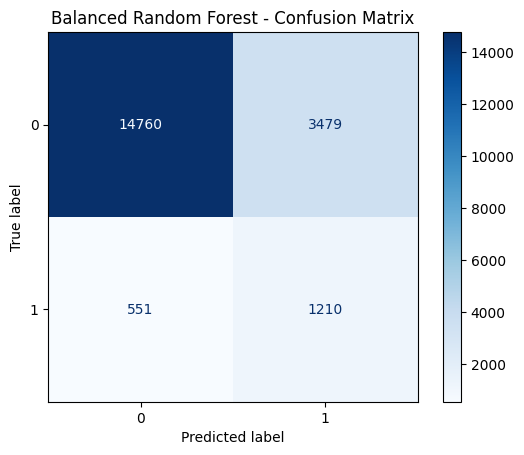


Training Easy Ensemble Classifier...

Easy Ensemble Classifier - Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.74      0.84     18239
           1       0.23      0.78      0.35      1761

    accuracy                           0.75     20000
   macro avg       0.60      0.76      0.60     20000
weighted avg       0.91      0.75      0.80     20000


Easy Ensemble Classifier - Confusion Matrix:


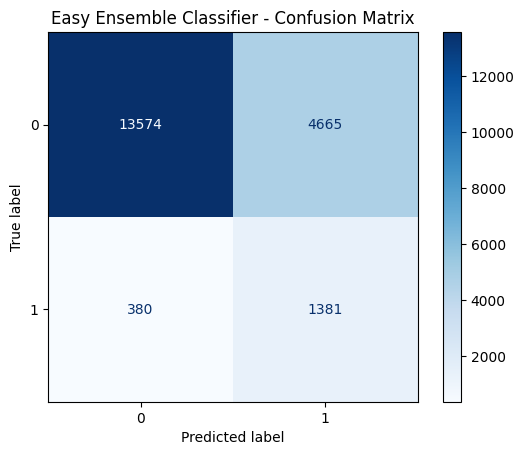


Model Performance Results:
                      Model  Train Accuracy  Test Accuracy  \
0    Balanced Random Forest        0.865000        0.79850   
1  Easy Ensemble Classifier        0.748038        0.74775   

   F1-Score (Class 0)  F1-Score (Class 1)  Recall (Class 0)  Recall (Class 1)  
0            0.879881            0.375194          0.809255          0.687110  
1            0.843289            0.353785          0.744229          0.784214  


<Figure size 1000x600 with 0 Axes>

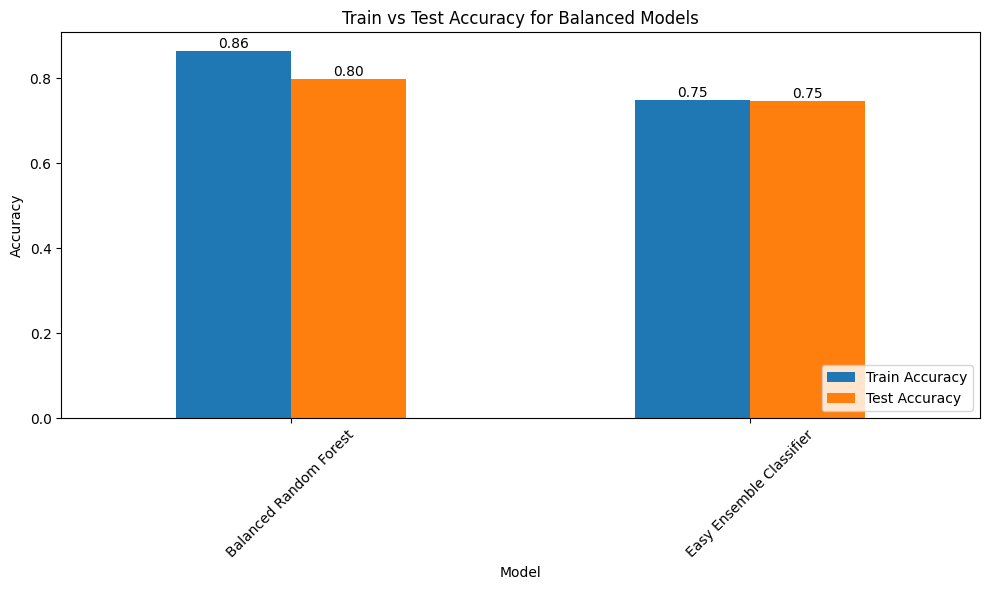

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier

# Train and evaluate the models
models = {
    "Balanced Random Forest": BalancedRandomForestClassifier(random_state=42),
    "Easy Ensemble Classifier": EasyEnsembleClassifier(random_state=42)
}

results = []

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_scaled, y_train)

    # Predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Classification metrics
    classification_metrics = classification_report(
        y_test, y_test_pred, output_dict=True, target_names=["Class 0", "Class 1"]
    )
    f1_score_class_0 = classification_metrics["Class 0"]["f1-score"]
    f1_score_class_1 = classification_metrics["Class 1"]["f1-score"]
    recall_class_0 = classification_metrics["Class 0"]["recall"]
    recall_class_1 = classification_metrics["Class 1"]["recall"]

    # Store results
    results.append({
        "Model": name,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "F1-Score (Class 0)": f1_score_class_0,
        "F1-Score (Class 1)": f1_score_class_1,
        "Recall (Class 0)": recall_class_0,
        "Recall (Class 1)": recall_class_1
    })

    # Print metrics
    print(f"\n{name} - Classification Report:")
    print(classification_report(y_test, y_test_pred))
    cm = confusion_matrix(y_test, y_test_pred)
    print(f"\n{name} - Confusion Matrix:")
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot(cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display results
print("\nModel Performance Results:")
print(results_df)

# Plotting train and test accuracy with values
plt.figure(figsize=(10, 6))
ax = results_df.set_index('Model')[['Train Accuracy', 'Test Accuracy']].plot(kind='bar', figsize=(10, 6))

# Annotating the bars with respective values
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')  # Display values up to 2 decimal points

plt.title("Train vs Test Accuracy for Balanced Models")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# Hyperparameter tuning

In [ ]:
!pip install optuna
import optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.4/383.4 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.2 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
IR

10.482374555057985

In [ ]:
def objective_rf(trial):
    # Define the hyperparameter space
    param = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 300),
        "max_depth": trial.suggest_int("max_depth", 5, 30),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 20),
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2", None]),
        "bootstrap": trial.suggest_categorical("bootstrap", [True, False]),
    }

    # Define class weights
    class_weights = {0: 1, 1: IR}  # Replace `IR` with your imbalance ratio

    # Define the model
    model = RandomForestClassifier(**param, class_weight=class_weights, random_state=10)

    # Perform cross-validation
    score = cross_val_score(model, X_train_scaled, y_train, scoring="roc_auc", cv=2, n_jobs=-1)
    return score.mean()

# Run the optimization
study_rf = optuna.create_study(direction="maximize")
study_rf.optimize(objective_rf, n_trials=30)

[I 2025-01-23 19:34:57,632] A new study created in memory with name: no-name-dd37cd6c-c857-4f02-90ff-4edf81f8a231
[I 2025-01-23 19:35:33,001] Trial 0 finished with value: 0.8354334453945803 and parameters: {'n_estimators': 225, 'max_depth': 18, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 0 with value: 0.8354334453945803.
[I 2025-01-23 19:35:49,069] Trial 1 finished with value: 0.8407330709229577 and parameters: {'n_estimators': 221, 'max_depth': 10, 'min_samples_split': 19, 'min_samples_leaf': 14, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 1 with value: 0.8407330709229577.
[I 2025-01-23 19:41:55,991] Trial 2 finished with value: 0.7521147801247626 and parameters: {'n_estimators': 286, 'max_depth': 30, 'min_samples_split': 15, 'min_samples_leaf': 20, 'max_features': None, 'bootstrap': False}. Best is trial 1 with value: 0.8407330709229577.
[I 2025-01-23 19:42:43,773] Trial 3 finished with value: 0.8425644372660

In [ ]:
# Best parameters and final evaluation
best_params_rf = study_rf.best_params
clf_rf = RandomForestClassifier(**best_params_rf, class_weight={0: 1, 1: IR}, random_state=10)
clf_rf.fit(X_train_scaled, y_train)
y_pred_rf = clf_rf.predict(X_test_scaled)
y_prob_rf = clf_rf.predict_proba(X_test_scaled)[:, 1]

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest AUC:", roc_auc_score(y_test, y_prob_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.78      0.87     18239
           1       0.25      0.73      0.37      1761

    accuracy                           0.78     20000
   macro avg       0.61      0.76      0.62     20000
weighted avg       0.90      0.78      0.82     20000

Random Forest AUC: 0.8408934819923198


In [ ]:
from sklearn.model_selection import cross_val_score
def objective_lgbm(trial):
    # Define the hyperparameter space
    param = {
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "num_leaves": trial.suggest_int("num_leaves", 20, 150),
        "max_depth": trial.suggest_int("max_depth", 3, 15),
        "min_child_samples": trial.suggest_int("min_child_samples", 10, 100),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.5, 1.0),
        "n_estimators": trial.suggest_int("n_estimators", 50, 300),
    }

    # Define the model
    model = LGBMClassifier(**param, random_state=10)

    # Perform cross-validation
    score = cross_val_score(model, X_train_scaled, y_train, scoring="roc_auc", cv=5, n_jobs=-1)
    return score.mean()

# Run the optimization
study_lgbm = optuna.create_study(direction="maximize")
study_lgbm.optimize(objective_lgbm, n_trials=50)

# Best parameters and score
print("Best parameters for LightGBM:", study_lgbm.best_params)
print("Best AUC for LightGBM:", study_lgbm.best_value)

[I 2025-01-23 20:00:13,964] A new study created in memory with name: no-name-34409330-8154-4de2-a5bf-7dfa19bca3e8
[I 2025-01-23 20:00:29,376] Trial 0 finished with value: 0.8232098877088248 and parameters: {'learning_rate': 0.25790729573354887, 'num_leaves': 32, 'max_depth': 9, 'min_child_samples': 74, 'feature_fraction': 0.7898317121569434, 'n_estimators': 259}. Best is trial 0 with value: 0.8232098877088248.
[I 2025-01-23 20:00:46,431] Trial 1 finished with value: 0.836947666184248 and parameters: {'learning_rate': 0.10670146494396382, 'num_leaves': 57, 'max_depth': 9, 'min_child_samples': 55, 'feature_fraction': 0.9411184956610094, 'n_estimators': 225}. Best is trial 1 with value: 0.836947666184248.
[I 2025-01-23 20:01:14,628] Trial 2 finished with value: 0.8433596680910741 and parameters: {'learning_rate': 0.022840027629205936, 'num_leaves': 113, 'max_depth': 12, 'min_child_samples': 100, 'feature_fraction': 0.9568033647955022, 'n_estimators': 246}. Best is trial 2 with value: 0.84

Best parameters for LightGBM: {'learning_rate': 0.023899548884213497, 'num_leaves': 46, 'max_depth': 6, 'min_child_samples': 80, 'feature_fraction': 0.5399861741986774, 'n_estimators': 218}
Best AUC for LightGBM: 0.8476875516594274


In [ ]:
IR2 = 2.44357279/0.09085512
scale_pos_weight=IR2

In [ ]:
best_params_lgbm = study_lgbm.best_params
clf_lgbm_weight = LGBMClassifier(
    **best_params_lgbm,
    scale_pos_weight=scale_pos_weight,
    random_state=10
)
clf_lgbm_weight.fit(X_train_scaled, y_train)

[LightGBM] [Warning] feature_fraction is set=0.5399861741986774, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5399861741986774
[LightGBM] [Warning] feature_fraction is set=0.5399861741986774, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5399861741986774
[LightGBM] [Info] Number of positive: 6948, number of negative: 73052
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.052338 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 994
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 112
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.086850 -> initscore=-2.352718
[LightGBM] [Info] Start training from score -2.352718
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

LGBMClassifier(feature_fraction=0.5399861741986774,
               learning_rate=0.023899548884213497, max_depth=6,
               min_child_samples=80, n_estimators=218, num_leaves=46,
               random_state=10, scale_pos_weight=26.895267872630626)

In [ ]:
y_pred_lgbm_weight = clf_lgbm_weight.predict(X_test_scaled)
y_prob_lgbm_weight = clf_lgbm_weight.predict_proba(X_test_scaled)[:, 1]
print("LightGBM with Tuned scale_pos_weight Classification Report:")
print(classification_report(y_test, y_pred_lgbm_weight))
print("LightGBM AUC:", roc_auc_score(y_test, y_prob_lgbm_weight))

[LightGBM] [Warning] feature_fraction is set=0.5399861741986774, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5399861741986774
[LightGBM] [Warning] feature_fraction is set=0.5399861741986774, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5399861741986774
LightGBM with Tuned scale_pos_weight Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.56      0.71     18239
           1       0.17      0.92      0.28      1761

    accuracy                           0.59     20000
   macro avg       0.58      0.74      0.50     20000
weighted avg       0.91      0.59      0.67     20000

LightGBM AUC: 0.8448586577383351


#DL Algorithms

In [ ]:
data_copy2

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Texas,Female,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,No,...,1.68,113.40,40.35,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
1,Wisconsin,Female,Good,2.0,5.0,Within past year (anytime less than 12 months ...,Yes,8.0,1 to 5,No,...,1.73,104.33,34.97,Yes,Yes,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
2,Idaho,Male,Poor,7.0,10.0,Within past year (anytime less than 12 months ...,Yes,6.0,1 to 5,No,...,1.73,104.33,34.97,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
3,Iowa,Female,Good,20.0,10.0,Within past year (anytime less than 12 months ...,No,8.0,All,Yes,...,1.68,127.01,45.19,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
4,South Dakota,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.60,49.90,19.49,Yes,No,Yes,No,"Yes, received Tdap",No,Tested positive using home test without a heal...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Utah,Male,Very good,3.0,0.0,5 or more years ago,Yes,7.0,None of them,No,...,1.70,77.11,26.63,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
99996,New Mexico,Male,Very good,30.0,10.0,Within past year (anytime less than 12 months ...,Yes,6.0,All,Yes,...,1.88,90.72,25.68,No,Yes,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
99997,Michigan,Female,Very good,2.0,12.0,5 or more years ago,No,7.0,None of them,No,...,1.65,56.70,20.80,Yes,Yes,Yes,Yes,"Yes, received Tdap",Yes,No
99998,Arizona,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.91,106.59,29.37,No,No,Yes,No,"Yes, received tetanus shot, but not Tdap",No,No


In [ ]:
data_copy2['HeartConditionBinary'] = ((data_copy2['HadHeartAttack'] == 'Yes') | (data_copy2['HadAngina'] == 'Yes')).astype(int)
data_copy2 = data_copy2.drop(['HadHeartAttack','HadAngina'],axis=1)
data_copy2

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadStroke,...,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,HeartConditionBinary
0,Texas,Female,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,No,...,113.40,40.35,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes,0
1,Wisconsin,Female,Good,2.0,5.0,Within past year (anytime less than 12 months ...,Yes,8.0,1 to 5,No,...,104.33,34.97,Yes,Yes,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No,0
2,Idaho,Male,Poor,7.0,10.0,Within past year (anytime less than 12 months ...,Yes,6.0,1 to 5,No,...,104.33,34.97,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No,1
3,Iowa,Female,Good,20.0,10.0,Within past year (anytime less than 12 months ...,No,8.0,All,No,...,127.01,45.19,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes,1
4,South Dakota,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,49.90,19.49,Yes,No,Yes,No,"Yes, received Tdap",No,Tested positive using home test without a heal...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Utah,Male,Very good,3.0,0.0,5 or more years ago,Yes,7.0,None of them,No,...,77.11,26.63,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No,0
99996,New Mexico,Male,Very good,30.0,10.0,Within past year (anytime less than 12 months ...,Yes,6.0,All,No,...,90.72,25.68,No,Yes,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No,1
99997,Michigan,Female,Very good,2.0,12.0,5 or more years ago,No,7.0,None of them,No,...,56.70,20.80,Yes,Yes,Yes,Yes,"Yes, received Tdap",Yes,No,0
99998,Arizona,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,106.59,29.37,No,No,Yes,No,"Yes, received tetanus shot, but not Tdap",No,No,0


In [ ]:
numerical_cols2 = data_copy2.select_dtypes(include=['float64','number']).columns
numerical_data2 = data_copy2[numerical_cols]
numerical_data2

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
0,0.0,0.0,8.0,1.68,113.40,40.35
1,2.0,5.0,8.0,1.73,104.33,34.97
2,7.0,10.0,6.0,1.73,104.33,34.97
3,20.0,10.0,8.0,1.68,127.01,45.19
4,0.0,0.0,7.0,1.60,49.90,19.49
...,...,...,...,...,...,...
99995,3.0,0.0,7.0,1.70,77.11,26.63
99996,30.0,10.0,6.0,1.88,90.72,25.68
99997,2.0,12.0,7.0,1.65,56.70,20.80
99998,0.0,0.0,7.0,1.91,106.59,29.37


In [ ]:
categorical_cols2 = data_copy2.select_dtypes(include=['object','category']).columns

In [ ]:
data_copy2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 39 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      100000 non-null  object 
 1   Sex                        100000 non-null  object 
 2   GeneralHealth              100000 non-null  object 
 3   PhysicalHealthDays         100000 non-null  float64
 4   MentalHealthDays           100000 non-null  float64
 5   LastCheckupTime            100000 non-null  object 
 6   PhysicalActivities         100000 non-null  object 
 7   SleepHours                 100000 non-null  float64
 8   RemovedTeeth               100000 non-null  object 
 9   HadStroke                  100000 non-null  object 
 10  HadAsthma                  100000 non-null  object 
 11  HadSkinCancer              100000 non-null  object 
 12  HadCOPD                    100000 non-null  object 
 13  HadDepressiveDisorder      100

#1)TabNET

In [ ]:
!pip install pytorch-tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 42.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
from sklearn.preprocessing import LabelEncoder
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

In [ ]:
# Step 1: Encode categorical features
label_encoders = {}
cat_idxs = []
cat_dims = []

for col in categorical_cols2:
    le = LabelEncoder()
    data_copy2[col] = le.fit_transform(data_copy2[col].astype(str))  # Ensure data is string for LabelEncoder
    label_encoders[col] = le
    cat_idxs.append(data_copy2.columns.get_loc(col))  # Store column index
    cat_dims.append(len(le.classes_))  # Store number of unique classes

In [ ]:
# Step 2: Separate features and target
target = "HeartConditionBinary"
features = [col for col in data_copy2.columns if col != target]

X = data_copy2[features].values
y = data_copy2[target].values

# Step 3: Train-Validation-Test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=10)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=10)

In [ ]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_valid.shape, y_valid.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (70000, 38) (70000,)
Validation set shape: (15000, 38) (15000,)
Test set shape: (15000, 38) (15000,)


In [ ]:
# Step 4: Confirm data types
print(f"X_train: {type(X_train)}, dtype: {X_train.dtype}")
print(f"X_valid: {type(X_valid)}, dtype: {X_valid.dtype}")
print(f"y_train: {type(y_train)}, dtype: {y_train.dtype}")
print(f"y_valid: {type(y_valid)}, dtype: {y_valid.dtype}")
print(f"X_test: {type(X_test)}, dtype: {X_test.dtype}")
print(f"y_test: {type(y_test)}, dtype: {y_test.dtype}")

X_train: <class 'numpy.ndarray'>, dtype: float64
X_valid: <class 'numpy.ndarray'>, dtype: float64
y_train: <class 'numpy.ndarray'>, dtype: int64
y_valid: <class 'numpy.ndarray'>, dtype: int64
X_test: <class 'numpy.ndarray'>, dtype: float64
y_test: <class 'numpy.ndarray'>, dtype: int64


In [ ]:
# TabNet parameters
tabnet_params = {
    "cat_idxs": cat_idxs,
    "cat_dims": cat_dims,
    "cat_emb_dim": 2,  # Embedding dimension for categorical features
    "optimizer_fn": torch.optim.Adam,
    "optimizer_params": dict(lr=2e-2),
    "scheduler_params": {"step_size": 50, "gamma": 0.9},
    "scheduler_fn": torch.optim.lr_scheduler.StepLR,
    "mask_type": "entmax",  # Use 'entmax' for sparse attention
    "device_name": "cuda" if torch.cuda.is_available() else "cpu",
}

# Initialize TabNet Classifier
clf = TabNetClassifier(**tabnet_params)

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


#NO CSL


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Initialize an empty list to store results
results = []

# Train the model without class weights (using the original training set)
clf.fit(
    X_train=X_train,
    y_train=y_train,
    eval_set=[(X_train, y_train), (X_valid, y_valid)],
    eval_name=["train", "valid"],
    eval_metric=["auc"],
    max_epochs=100,  # Train for 100 epochs
    patience=15,  # Allow early stopping after 15 epochs without improvement
    batch_size=512,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False,
)

# Generate predictions
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score for both classes (0 and 1)
precision_class_0 = precision_score(y_test, y_pred, pos_label=0)
recall_class_0 = recall_score(y_test, y_pred, pos_label=0)
f1_class_0 = f1_score(y_test, y_pred, pos_label=0)

precision_class_1 = precision_score(y_test, y_pred, pos_label=1)
recall_class_1 = recall_score(y_test, y_pred, pos_label=1)
f1_class_1 = f1_score(y_test, y_pred, pos_label=1)

# AUC-ROC score
auc_score = roc_auc_score(y_test, y_prob)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Training accuracy
y_train_pred = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Store the results
results.append({
    'Test Accuracy': test_accuracy,
    'Train Accuracy': train_accuracy,
    'Precision (Class 0)': precision_class_0,
    'Recall (Class 0)': recall_class_0,
    'F1 Score (Class 0)': f1_class_0,
    'Precision (Class 1)': precision_class_1,
    'Recall (Class 1)': recall_class_1,
    'F1 Score (Class 1)': f1_class_1,
    'AUC-ROC Score': auc_score
})

# Create a DataFrame to display results
results_df = pd.DataFrame(results)

# Display the table
print(results_df)

epoch 0  | loss: 0.29026 | train_auc: 0.76917 | valid_auc: 0.77149 |  0:00:42s
epoch 1  | loss: 0.24987 | train_auc: 0.81402 | valid_auc: 0.80643 |  0:01:07s
epoch 2  | loss: 0.24048 | train_auc: 0.83188 | valid_auc: 0.81901 |  0:01:22s
epoch 3  | loss: 0.23765 | train_auc: 0.83682 | valid_auc: 0.82514 |  0:01:46s
epoch 4  | loss: 0.23288 | train_auc: 0.84448 | valid_auc: 0.83109 |  0:02:07s
epoch 5  | loss: 0.23064 | train_auc: 0.84956 | valid_auc: 0.8336  |  0:02:28s
epoch 6  | loss: 0.22891 | train_auc: 0.85184 | valid_auc: 0.83743 |  0:02:42s
epoch 7  | loss: 0.22905 | train_auc: 0.85013 | valid_auc: 0.83426 |  0:02:54s
epoch 8  | loss: 0.2275  | train_auc: 0.8521  | valid_auc: 0.83726 |  0:03:04s
epoch 9  | loss: 0.22576 | train_auc: 0.85655 | valid_auc: 0.83898 |  0:03:17s
epoch 10 | loss: 0.22594 | train_auc: 0.85745 | valid_auc: 0.8385  |  0:03:36s
epoch 11 | loss: 0.22496 | train_auc: 0.85798 | valid_auc: 0.83793 |  0:03:55s
epoch 12 | loss: 0.22444 | train_auc: 0.85932 | vali

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


   Test Accuracy  Train Accuracy  Precision (Class 0)  Recall (Class 0)  \
0       0.918267           0.914             0.919461           0.99818   

   F1 Score (Class 0)  Precision (Class 1)  Recall (Class 1)  \
0            0.957205             0.715909          0.049842   

   F1 Score (Class 1)  AUC-ROC Score  
0            0.093195       0.840073  


# CSL

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

weights_list = [
    {0: 1, 1: 10.48},  # IR
    {0: (1/10.48), 1: 1},      # WCUSTOM WITH IR
    {0:0.00896487902392998, 1:0.9910351209760699},      # ICF
    {0:0.03584837416030507, 1:0.9641516258396949}       # LICF
]

# Initialize an empty list to store results
results = []

# Loop through all the weights and train the model for each
for weights in weights_list:
    # Train the model with current weights
    clf.fit(
        X_train=X_train,
        y_train=y_train,
        eval_set=[(X_train, y_train), (X_valid, y_valid)],
        eval_name=["train", "valid"],
        eval_metric=["auc"],
        max_epochs=100,  # Train for 100 epochs
        patience=15,  # Allow early stopping after 10 epochs without improvement
        batch_size=512,
        virtual_batch_size=128,
        weights=weights,  # Use the current weight set
        num_workers=0,
        drop_last=False,
    )

    # Generate predictions
    y_pred = clf.predict(X_test)
    y_prob = clf.predict_proba(X_test)[:, 1]

    # Test accuracy
    test_accuracy = accuracy_score(y_test, y_pred)

    # Calculate precision, recall, and F1 score for both classes (0 and 1)
    precision_class_0 = precision_score(y_test, y_pred, pos_label=0)
    recall_class_0 = recall_score(y_test, y_pred, pos_label=0)
    f1_class_0 = f1_score(y_test, y_pred, pos_label=0)

    precision_class_1 = precision_score(y_test, y_pred, pos_label=1)
    recall_class_1 = recall_score(y_test, y_pred, pos_label=1)
    f1_class_1 = f1_score(y_test, y_pred, pos_label=1)

    # AUC-ROC score
    auc_score = roc_auc_score(y_test, y_prob)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Training accuracy
    y_train_pred = clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)

    # Store the results
    results.append({
        'Weight Set': str(weights),
        'Test Accuracy': test_accuracy,
        'Train Accuracy': train_accuracy,
        'Precision (Class 0)': precision_class_0,
        'Recall (Class 0)': recall_class_0,
        'F1 Score (Class 0)': f1_class_0,
        'Precision (Class 1)': precision_class_1,
        'Recall (Class 1)': recall_class_1,
        'F1 Score (Class 1)': f1_class_1,
        'AUC-ROC Score': auc_score
    })

# Create a DataFrame to display results
results_df = pd.DataFrame(results)

# Display the table
print(results_df)

epoch 0  | loss: 0.56827 | train_auc: 0.81847 | valid_auc: 0.81112 |  0:00:08s
epoch 1  | loss: 0.50982 | train_auc: 0.83916 | valid_auc: 0.82431 |  0:00:16s
epoch 2  | loss: 0.48038 | train_auc: 0.85135 | valid_auc: 0.83454 |  0:00:23s
epoch 3  | loss: 0.477   | train_auc: 0.85496 | valid_auc: 0.83552 |  0:00:31s
epoch 4  | loss: 0.471   | train_auc: 0.85962 | valid_auc: 0.82925 |  0:00:39s
epoch 5  | loss: 0.45984 | train_auc: 0.8636  | valid_auc: 0.83053 |  0:00:47s
epoch 6  | loss: 0.45599 | train_auc: 0.86584 | valid_auc: 0.82658 |  0:00:56s
epoch 7  | loss: 0.45103 | train_auc: 0.86974 | valid_auc: 0.82868 |  0:01:03s
epoch 8  | loss: 0.44461 | train_auc: 0.86927 | valid_auc: 0.82762 |  0:01:11s
epoch 9  | loss: 0.44114 | train_auc: 0.87227 | valid_auc: 0.82065 |  0:01:20s
epoch 10 | loss: 0.43604 | train_auc: 0.87531 | valid_auc: 0.81525 |  0:01:27s
epoch 11 | loss: 0.43388 | train_auc: 0.87447 | valid_auc: 0.82151 |  0:01:36s
epoch 12 | loss: 0.42833 | train_auc: 0.87789 | vali

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.56827 | train_auc: 0.81847 | valid_auc: 0.81112 |  0:00:07s
epoch 1  | loss: 0.50982 | train_auc: 0.83916 | valid_auc: 0.82431 |  0:00:15s
epoch 2  | loss: 0.48038 | train_auc: 0.85135 | valid_auc: 0.83454 |  0:00:22s
epoch 3  | loss: 0.477   | train_auc: 0.85496 | valid_auc: 0.83552 |  0:00:30s
epoch 4  | loss: 0.471   | train_auc: 0.85962 | valid_auc: 0.82925 |  0:00:39s
epoch 5  | loss: 0.45984 | train_auc: 0.8636  | valid_auc: 0.83053 |  0:00:46s
epoch 6  | loss: 0.45599 | train_auc: 0.86584 | valid_auc: 0.82658 |  0:00:54s
epoch 7  | loss: 0.45103 | train_auc: 0.86974 | valid_auc: 0.82868 |  0:01:01s
epoch 8  | loss: 0.44461 | train_auc: 0.86927 | valid_auc: 0.82762 |  0:01:09s
epoch 9  | loss: 0.44114 | train_auc: 0.87227 | valid_auc: 0.82065 |  0:01:18s
epoch 10 | loss: 0.43604 | train_auc: 0.87531 | valid_auc: 0.81525 |  0:01:25s
epoch 11 | loss: 0.43388 | train_auc: 0.87447 | valid_auc: 0.82151 |  0:01:33s
epoch 12 | loss: 0.42833 | train_auc: 0.87789 | vali

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.2652  | train_auc: 0.81065 | valid_auc: 0.80322 |  0:00:07s
epoch 1  | loss: 0.22511 | train_auc: 0.8332  | valid_auc: 0.82092 |  0:00:15s
epoch 2  | loss: 0.21752 | train_auc: 0.84219 | valid_auc: 0.82825 |  0:00:23s
epoch 3  | loss: 0.2159  | train_auc: 0.84483 | valid_auc: 0.82789 |  0:00:30s
epoch 4  | loss: 0.21331 | train_auc: 0.84812 | valid_auc: 0.82806 |  0:00:38s
epoch 5  | loss: 0.2046  | train_auc: 0.85018 | valid_auc: 0.8305  |  0:00:46s
epoch 6  | loss: 0.20624 | train_auc: 0.85187 | valid_auc: 0.82553 |  0:00:54s
epoch 7  | loss: 0.20567 | train_auc: 0.85317 | valid_auc: 0.82512 |  0:01:01s
epoch 8  | loss: 0.19988 | train_auc: 0.8558  | valid_auc: 0.82242 |  0:01:09s
epoch 9  | loss: 0.19403 | train_auc: 0.85585 | valid_auc: 0.81844 |  0:01:17s
epoch 10 | loss: 0.19486 | train_auc: 0.85814 | valid_auc: 0.81919 |  0:01:25s
epoch 11 | loss: 0.19103 | train_auc: 0.85583 | valid_auc: 0.81993 |  0:01:33s
epoch 12 | loss: 0.18794 | train_auc: 0.85836 | vali

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.48003 | train_auc: 0.81702 | valid_auc: 0.80938 |  0:00:07s
epoch 1  | loss: 0.42764 | train_auc: 0.84363 | valid_auc: 0.83084 |  0:00:15s
epoch 2  | loss: 0.41765 | train_auc: 0.85199 | valid_auc: 0.83877 |  0:00:23s
epoch 3  | loss: 0.40427 | train_auc: 0.85408 | valid_auc: 0.83807 |  0:00:30s
epoch 4  | loss: 0.40411 | train_auc: 0.85617 | valid_auc: 0.83917 |  0:00:38s
epoch 5  | loss: 0.39839 | train_auc: 0.85855 | valid_auc: 0.83559 |  0:00:46s
epoch 6  | loss: 0.39507 | train_auc: 0.8613  | valid_auc: 0.8321  |  0:00:54s
epoch 7  | loss: 0.39331 | train_auc: 0.86063 | valid_auc: 0.83316 |  0:01:02s
epoch 8  | loss: 0.39362 | train_auc: 0.86435 | valid_auc: 0.831   |  0:01:09s
epoch 9  | loss: 0.38502 | train_auc: 0.86828 | valid_auc: 0.83314 |  0:01:17s
epoch 10 | loss: 0.38048 | train_auc: 0.86822 | valid_auc: 0.82729 |  0:01:25s
epoch 11 | loss: 0.37056 | train_auc: 0.86911 | valid_auc: 0.82534 |  0:01:32s
epoch 12 | loss: 0.36839 | train_auc: 0.87262 | vali

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


                                        Weight Set  Test Accuracy  \
0                                 {0: 1, 1: 10.48}       0.738133   
1                   {0: 0.09541984732824427, 1: 1}       0.738133   
2  {0: 0.00896487902392998, 1: 0.9910351209760699}       0.342867   
3  {0: 0.03584837416030507, 1: 0.9641516258396949}       0.619267   

   Train Accuracy  Precision (Class 0)  Recall (Class 0)  F1 Score (Class 0)  \
0        0.748186             0.974550          0.733183            0.836809   
1        0.748186             0.974550          0.733183            0.836809   
2        0.346071             0.994392          0.283998            0.441814   
3        0.627457             0.985246          0.593113            0.740468   

   Precision (Class 1)  Recall (Class 1)  F1 Score (Class 1)  AUC-ROC Score  
0             0.214531          0.791930            0.337605       0.835555  
1             0.214531          0.791930            0.337605       0.835555  
2             0.112

# DONT RUN

In [ ]:
def objective(trial):
    # Suggest hyperparameters
    cat_emb_dim = trial.suggest_int("cat_emb_dim", 1, 10)
    lr = trial.suggest_float("learning_rate", 1e-3, 1e-1, log=True)
    gamma = trial.suggest_float("gamma", 0.5, 0.99)
    step_size = trial.suggest_int("step_size", 10, 100)
    mask_type = trial.suggest_categorical("mask_type", ["entmax", "sparsemax"])
    batch_size = trial.suggest_categorical("batch_size", [128, 256, 512])

    # Initialize TabNet with the suggested hyperparameters
    clf1 = TabNetClassifier(
        cat_idxs=cat_idxs,
        cat_dims=cat_dims,
        cat_emb_dim=cat_emb_dim,
        optimizer_fn=torch.optim.Adam,
        optimizer_params={"lr": lr},
        scheduler_params={"step_size": step_size, "gamma": gamma},
        scheduler_fn=torch.optim.lr_scheduler.StepLR,
        mask_type=mask_type,
        device_name="cuda" if torch.cuda.is_available() else "cpu",
    )

    # Train the model
    clf1.fit(
        X_train=X_train,
        y_train=y_train,
        eval_set=[(X_valid, y_valid)],
        eval_name=["valid"],
        eval_metric=["auc"],
        max_epochs=45,  # Maximum number of epochs for tuning
        patience=10,  # Early stopping
        batch_size=batch_size,
        virtual_batch_size=128,
        weights={0: 1, 1: 10.482374555057985},  # Adjust weights for imbalance
        num_workers=0,
        drop_last=False,
    )

    # Evaluate on the validation set
    preds_valid = clf1.predict_proba(X_valid)[:, 1]  # Get probabilities for the positive class
    valid_auc = roc_auc_score(y_valid, preds_valid)  # Compute AUC

    return valid_auc  # Optuna will maximize this value

In [ ]:
# Create an Optuna study and optimize
study = optuna.create_study(direction="maximize")  # Maximize AUC
study.optimize(objective, n_trials=1)  # Perform 40 trials

# Output the best hyperparameters and score
print("Best hyperparameters:", study.best_params)
print("Best validation AUC:", study.best_value)

[I 2025-01-23 20:15:40,559] A new study created in memory with name: no-name-caaf8f8d-d857-4e46-8e4a-8f496f6b4f47


epoch 0  | loss: 0.5312  | valid_auc: 0.83357 |  0:00:21s
epoch 1  | loss: 0.48676 | valid_auc: 0.83574 |  0:00:37s
epoch 2  | loss: 0.4747  | valid_auc: 0.83457 |  0:00:53s
epoch 3  | loss: 0.46722 | valid_auc: 0.82941 |  0:01:09s
epoch 4  | loss: 0.45903 | valid_auc: 0.82743 |  0:01:24s
epoch 5  | loss: 0.44881 | valid_auc: 0.8279  |  0:01:42s
epoch 6  | loss: 0.43833 | valid_auc: 0.8265  |  0:01:57s
epoch 7  | loss: 0.43218 | valid_auc: 0.82578 |  0:02:12s
epoch 8  | loss: 0.42272 | valid_auc: 0.81971 |  0:02:28s
epoch 9  | loss: 0.41108 | valid_auc: 0.81571 |  0:02:44s
epoch 10 | loss: 0.4051  | valid_auc: 0.81864 |  0:03:00s
epoch 11 | loss: 0.39855 | valid_auc: 0.8122  |  0:03:16s

Early stopping occurred at epoch 11 with best_epoch = 1 and best_valid_auc = 0.83574


[I 2025-01-23 20:19:23,901] Trial 0 finished with value: 0.8357393578419507 and parameters: {'cat_emb_dim': 9, 'learning_rate': 0.023983413748888904, 'gamma': 0.9119600633289875, 'step_size': 20, 'mask_type': 'sparsemax', 'batch_size': 128}. Best is trial 0 with value: 0.8357393578419507.


Best hyperparameters: {'cat_emb_dim': 9, 'learning_rate': 0.023983413748888904, 'gamma': 0.9119600633289875, 'step_size': 20, 'mask_type': 'sparsemax', 'batch_size': 128}
Best validation AUC: 0.8357393578419507


In [ ]:
best_params = study.best_params

clf_best = TabNetClassifier(
    cat_idxs=cat_idxs,
    cat_dims=cat_dims,
    cat_emb_dim=best_params["cat_emb_dim"],
    optimizer_fn=torch.optim.Adam,
    optimizer_params={
        "lr": best_params["learning_rate"]
    },
    scheduler_params={
        "step_size": best_params["step_size"],
        "gamma": best_params["gamma"]
    },
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    mask_type=best_params["mask_type"],
    device_name="cuda" if torch.cuda.is_available() else "cpu",
)

clf_best.fit(
    X_train=X_train,
    y_train=y_train,
    eval_set=[(X_valid, y_valid), (X_test, y_test),(X_train, y_train)],  # Evaluate on both validation and test sets
    eval_name=["valid", "test", "train"],
    eval_metric=["auc"],
    max_epochs=45,  # Train for more epochs with the best hyperparameters
    patience=10,
    batch_size=best_params["batch_size"],
    virtual_batch_size=128,
    weights={0: 1, 1: 10.482374555057985},
    num_workers=0,
    drop_last=False,
)

# Evaluate on the test set
preds_test = clf_best.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, preds_test)
print("Test AUC:", test_auc)

epoch 0  | loss: 0.5312  | valid_auc: 0.83357 | test_auc: 0.83363 | train_auc: 0.84106 |  0:00:23s
epoch 1  | loss: 0.48761 | valid_auc: 0.83459 | test_auc: 0.8365  | train_auc: 0.84751 |  0:00:47s
epoch 2  | loss: 0.47565 | valid_auc: 0.83567 | test_auc: 0.83868 | train_auc: 0.85471 |  0:01:10s
epoch 3  | loss: 0.46714 | valid_auc: 0.83233 | test_auc: 0.83286 | train_auc: 0.85835 |  0:01:34s
epoch 4  | loss: 0.45685 | valid_auc: 0.8319  | test_auc: 0.83524 | train_auc: 0.86577 |  0:01:56s
epoch 5  | loss: 0.44674 | valid_auc: 0.82743 | test_auc: 0.83183 | train_auc: 0.86893 |  0:02:33s
epoch 6  | loss: 0.43675 | valid_auc: 0.82856 | test_auc: 0.83287 | train_auc: 0.87498 |  0:02:57s
epoch 7  | loss: 0.42538 | valid_auc: 0.82176 | test_auc: 0.83148 | train_auc: 0.87999 |  0:03:21s
epoch 8  | loss: 0.41891 | valid_auc: 0.81468 | test_auc: 0.82234 | train_auc: 0.88149 |  0:03:45s
epoch 9  | loss: 0.41031 | valid_auc: 0.81706 | test_auc: 0.82853 | train_auc: 0.88842 |  0:04:09s
epoch 10 |

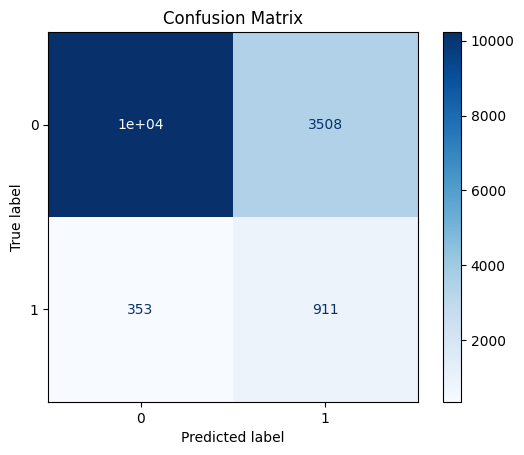

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.74      0.84     13736
           1       0.21      0.72      0.32      1264

    accuracy                           0.74     15000
   macro avg       0.59      0.73      0.58     15000
weighted avg       0.90      0.74      0.80     15000

Test AUC: 0.8106


In [ ]:
# Predictions
y_pred = clf_best.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=[0, 1])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# TEST AUC SCORE
from sklearn.metrics import roc_auc_score
y_prob = clf_best.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_prob)
print(f"Test AUC: {test_auc:.4f}")

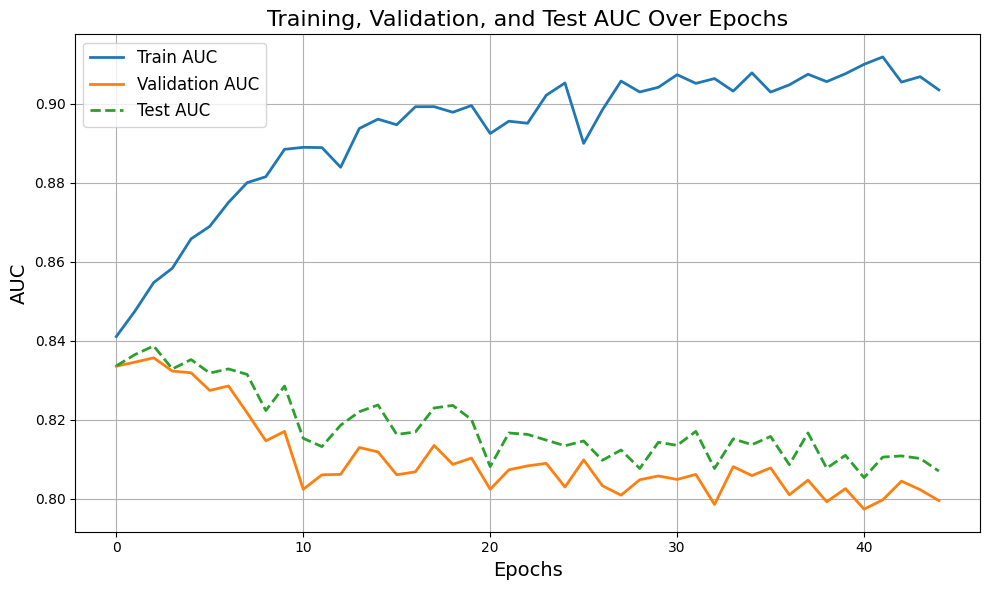

In [ ]:
# PLOT TRAINING, VALIDATION, AND TEST AUC
plt.figure(figsize=(10, 6))
plt.plot(clf_best.history["train_auc"], label="Train AUC", linewidth=2)
plt.plot(clf_best.history["valid_auc"], label="Validation AUC", linewidth=2)
plt.plot(clf_best.history["test_auc"], label="Test AUC", linewidth=2, linestyle='--')

# Plot Settings
plt.title("Training, Validation, and Test AUC Over Epochs", fontsize=16)
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("AUC", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

#2)MLP

In [ ]:
data_copy3['HeartConditionBinary'] = ((data_copy3['HadHeartAttack'] == 'Yes') | (data_copy3['HadAngina'] == 'Yes')).astype(int)
data_copy3 = data_copy3.drop(['HadHeartAttack','HadAngina'],axis=1)
data_copy3

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadStroke,...,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,HeartConditionBinary
0,Texas,Female,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,No,...,113.40,40.35,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes,0
1,Wisconsin,Female,Good,2.0,5.0,Within past year (anytime less than 12 months ...,Yes,8.0,1 to 5,No,...,104.33,34.97,Yes,Yes,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No,0
2,Idaho,Male,Poor,7.0,10.0,Within past year (anytime less than 12 months ...,Yes,6.0,1 to 5,No,...,104.33,34.97,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No,1
3,Iowa,Female,Good,20.0,10.0,Within past year (anytime less than 12 months ...,No,8.0,All,No,...,127.01,45.19,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes,1
4,South Dakota,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,49.90,19.49,Yes,No,Yes,No,"Yes, received Tdap",No,Tested positive using home test without a heal...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,Maryland,Male,Very good,15.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,1 to 5,No,...,58.97,17.63,Yes,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No,0
19996,Maryland,Male,Good,0.0,5.0,5 or more years ago,Yes,6.0,1 to 5,No,...,113.40,32.98,Yes,No,Yes,No,"Yes, received Tdap",No,No,0
19997,Maine,Female,Fair,4.0,12.0,Within past year (anytime less than 12 months ...,Yes,4.0,All,Yes,...,90.72,33.28,No,No,Yes,Yes,"Yes, received tetanus shot, but not Tdap",No,No,0
19998,Connecticut,Male,Good,0.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,None of them,No,...,117.93,32.50,Yes,Yes,No,No,"Yes, received Tdap",No,Yes,0


In [ ]:
nominal_features = ['State', 'RaceEthnicityCategory', 'TetanusLast10Tdap', 'CovidPos','RemovedTeeth','SmokerStatus','ECigaretteUsage','HadDiabetes']
binary_features = [
     'HadStroke', 'HadAsthma', 'HadSkinCancer',
    'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
    'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating',
    'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands',
    'PhysicalActivities', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12',
    'PneumoVaxEver', 'HighRiskLastYear', 'ChestScan'
]
ordinal_features = ['GeneralHealth', 'LastCheckupTime', 'AgeCategory']

data_copy3['Sex'] = data_copy3['Sex'].replace({'Male':1,'Female':0})

<ipython-input-68-a199e0dca117>:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_copy3['Sex'] = data_copy3['Sex'].replace({'Male':1,'Female':0})


In [ ]:
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
nominal_encoded3 = pd.DataFrame(
    one_hot_encoder.fit_transform(data_copy3[nominal_features]),
    columns=one_hot_encoder.get_feature_names_out(nominal_features),
    index=data_copy3.index  # Align indices with the original DataFrame
)

binary_encoded3 = data_copy3[binary_features].replace({'Yes': 1, 'No': 0}).astype(int)


ordinal_mappings = {
    'GeneralHealth': ['Poor', 'Fair', 'Good', 'Very good', 'Excellent'],
    'LastCheckupTime': [
        '5 or more years ago',
        'Within past 5 years (2 years but less than 5 years ago)',
        'Within past 2 years (1 year but less than 2 years ago)',
        'Within past year (anytime less than 12 months ago)'
    ],
    'AgeCategory':[
        'Age 18 to 24', 'Age 25 to 29', 'Age 30 to 34', 'Age 35 to 39', 'Age 40 to 44', 'Age 45 to 49', 'Age 50 to 54', 'Age 55 to 59','Age 60 to 64', 'Age 65 to 69'
         ,'Age 70 to 74','Age 75 to 79','Age 80 or older'
    ]
}

ordinal_encoded3 = data_copy3[ordinal_features].replace({
    col: {val: i for i, val in enumerate(vals)} for col, vals in ordinal_mappings.items()
})

<ipython-input-69-615d83e2290d>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  binary_encoded3 = data_copy3[binary_features].replace({'Yes': 1, 'No': 0}).astype(int)
<ipython-input-69-615d83e2290d>:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ordinal_encoded3 = data_copy3[ordinal_features].replace({


In [ ]:
data_copy3['HeartConditionBinary'] = data_copy3['HeartConditionBinary'].astype('category')
data_copy3['Sex'] = data_copy2['Sex'].astype('category')

In [ ]:
numerical_cols3 = data_copy3.select_dtypes(include=['float64','number']).columns
numerical_data3 = data_copy3[numerical_cols3]
numerical_data3

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
0,0.0,0.0,8.0,1.68,113.40,40.35
1,2.0,5.0,8.0,1.73,104.33,34.97
2,7.0,10.0,6.0,1.73,104.33,34.97
3,20.0,10.0,8.0,1.68,127.01,45.19
4,0.0,0.0,7.0,1.60,49.90,19.49
...,...,...,...,...,...,...
19995,15.0,0.0,8.0,1.83,58.97,17.63
19996,0.0,5.0,6.0,1.85,113.40,32.98
19997,4.0,12.0,4.0,1.65,90.72,33.28
19998,0.0,3.0,5.0,1.91,117.93,32.50


In [ ]:
numerical_cols3

Index(['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours',
       'HeightInMeters', 'WeightInKilograms', 'BMI'],
      dtype='object')

In [ ]:
processed_data1 = pd.concat([nominal_encoded3, binary_encoded3, ordinal_encoded3,numerical_data3], axis=1)
processed_data1['HeartConditionBinary'] = data_copy3['HeartConditionBinary'].values
processed_data1

,State_Alabama,State_Alaska,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,State_Delaware,State_District of Columbia,State_Florida,...,GeneralHealth,LastCheckupTime,AgeCategory,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI,HeartConditionBinary
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,3,6,0.0,0.0,8.0,1.68,113.40,40.35,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,3,9,2.0,5.0,8.0,1.73,104.33,34.97,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,3,1,7.0,10.0,6.0,1.73,104.33,34.97,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,3,8,20.0,10.0,8.0,1.68,127.01,45.19,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4,3,8,0.0,0.0,7.0,1.60,49.90,19.49,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,3,12,15.0,0.0,8.0,1.83,58.97,17.63,0
19996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,0,4,0.0,5.0,6.0,1.85,113.40,32.98,0
19997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,3,10,4.0,12.0,4.0,1.65,90.72,33.28,0
19998,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2,3,6,0.0,3.0,5.0,1.91,117.93,32.50,0


In [ ]:
!pip install optuna
import torch
import torch.nn as nn
import torch.optim as optim
import optuna

In [ ]:
X3 = processed_data1.drop(columns=['HeartConditionBinary'])
y3 = processed_data1['HeartConditionBinary']

# Split into train, validation, and test sets (70% train, 15% validation, 15% test)
X3_train, X3_temp, y3_train, y3_temp = train_test_split(X3, y3, test_size=0.3, random_state=10)
X3_valid, X3_test, y3_valid, y3_test = train_test_split(X3_temp, y3_temp, test_size=0.5, random_state=10)


In [ ]:
scaler = StandardScaler()

X3_train[numerical_cols3] = scaler.fit_transform(X3_train[numerical_cols3])
X3_valid[numerical_cols3] = scaler.transform(X3_valid[numerical_cols3])
X3_test[numerical_cols3] = scaler.transform(X3_test[numerical_cols3])

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

X3_train_tensor = torch.tensor(X3_train.values, dtype=torch.float32)
y3_train_tensor = torch.tensor(y3_train.values, dtype=torch.float32).view(-1, 1)

X3_valid_tensor = torch.tensor(X3_valid.values, dtype=torch.float32)
y3_valid_tensor = torch.tensor(y3_valid.values, dtype=torch.float32).view(-1, 1)

X3_test_tensor = torch.tensor(X3_test.values, dtype=torch.float32)
y3_test_tensor = torch.tensor(y3_test.values, dtype=torch.float32).view(-1, 1)

# Check the shapes of the splits
print(f"Training Data: {X3_train_tensor.shape}, Validation Data: {X3_valid_tensor.shape}, Test Data: {X3_test_tensor.shape}")

Training Data: torch.Size([14000, 111]), Validation Data: torch.Size([3000, 111]), Test Data: torch.Size([3000, 111])


In [ ]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#NO CSL

Epoch [5/20], Loss: 0.1501, Training Accuracy: 0.9149
Epoch [10/20], Loss: 0.1317, Training Accuracy: 0.9168
Epoch [15/20], Loss: 0.1098, Training Accuracy: 0.9198
Epoch [20/20], Loss: 0.1189, Training Accuracy: 0.9236
Test Accuracy: 0.9123
Test Classification Report:
              precision    recall  f1-score   support

     Class 0       0.93      0.98      0.95     13736
     Class 1       0.43      0.13      0.21      1264

    accuracy                           0.91     15000
   macro avg       0.68      0.56      0.58     15000
weighted avg       0.88      0.91      0.89     15000

Confusion Matrix:
[[13514   222]
 [ 1094   170]]


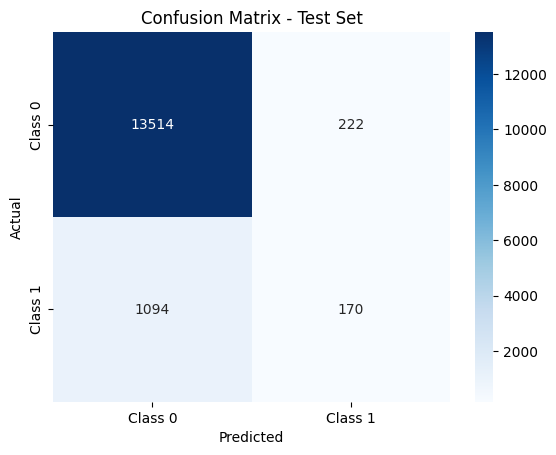

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define hyperparameters
hidden_size1 = 128   # Size of the first hidden layer
hidden_size2 = 64    # Size of the second hidden layer
dropout = 0.2        # Dropout rate

# Define the model using nn.Sequential
def create_model():
    model = nn.Sequential(
        nn.Linear(X3_train_tensor.shape[1], hidden_size1),  # Input layer to first hidden layer
        nn.ReLU(),  # ReLU activation
        nn.Dropout(dropout),  # Dropout layer to prevent overfitting
        nn.Linear(hidden_size1, hidden_size2),  # First hidden layer to second hidden layer
        nn.ReLU(),  # ReLU activation
        nn.Dropout(dropout),  # Dropout layer to prevent overfitting
        nn.Linear(hidden_size2, 1),  # Second hidden layer to output layer
        nn.Sigmoid()  # Sigmoid activation for binary classification
    )
    return model

# Define optimizer (Adam)
optimizer = optim.Adam

# Function to train and evaluate the model without any weights
def train_and_evaluate(model, optimizer):
    # Recreate the model and move it to the device
    model = create_model().to(device)

    # Initialize optimizer
    optimizer = optimizer(model.parameters(), lr=0.001)

    # Define number of epochs for training
    epochs = 20
    batch_size = 64

    # Training loop
    for epoch in range(epochs):
        model.train()  # Set the model to training mode

        # Initialize variable for training accuracy tracking
        correct_train = 0
        total_train = 0

        # Mini-batch gradient descent
        for i in range(0, X3_train_tensor.shape[0], batch_size):
            # Get mini-batch
            batch_X = X3_train_tensor[i:i+batch_size].to(device)
            batch_y = y3_train_tensor[i:i+batch_size].to(device)

            # Zero the gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(batch_X)

            # Compute loss
            criterion = nn.BCELoss()  # Using BCELoss without weight argument
            loss = criterion(outputs, batch_y)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            # Track accuracy for training
            predicted = (outputs > 0.5).float()  # Apply threshold of 0.5 to get binary predictions
            correct_train += (predicted == batch_y).sum().item()
            total_train += batch_y.size(0)

        # Calculate and print training accuracy
        train_accuracy = correct_train / total_train
        if (epoch + 1) % 5 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Training Accuracy: {train_accuracy:.4f}")

    # Evaluate the model on the test set
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        y3_test_pred = model(X3_test_tensor.to(device)).cpu().numpy()
        y3_test_pred = (y3_test_pred > 0.5).astype(int)  # Convert sigmoid output to binary (0 or 1)

    # Calculate accuracy on test set
    test_accuracy = accuracy_score(y3_test_tensor.numpy(), y3_test_pred.flatten())
    print(f"Test Accuracy: {test_accuracy:.4f}")

    # Print classification report for test set (Precision, Recall, F1 Score for both classes)
    print("Test Classification Report:")
    print(classification_report(y3_test_tensor.numpy(), y3_test_pred.flatten(), target_names=["Class 0", "Class 1"]))

    # Confusion matrix for test set
    cm = confusion_matrix(y3_test_tensor.numpy(), y3_test_pred.flatten())
    print("Confusion Matrix:")
    print(cm)

    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix - Test Set')
    plt.show()

# Train and evaluate the model without weights
train_and_evaluate(create_model(), optimizer)


#CSL


Training and Evaluating with Weight Set: {0: 1, 1: 10.48}
Epoch [5/20], Loss: 0.1914, Training Accuracy: 0.9139
Epoch [10/20], Loss: 0.1689, Training Accuracy: 0.9185
Epoch [15/20], Loss: 0.0848, Training Accuracy: 0.9269
Epoch [20/20], Loss: 0.0969, Training Accuracy: 0.9413
Test Accuracy for Weight Set {0: 1, 1: 10.48}: 0.8877


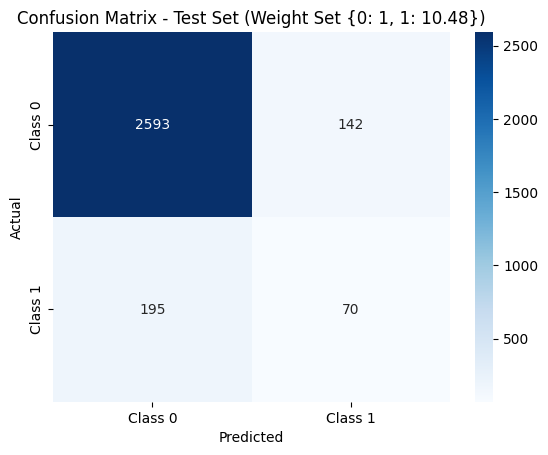


Training and Evaluating with Weight Set: {0: 0.09541984732824427, 1: 1}
Epoch [5/20], Loss: 0.1950, Training Accuracy: 0.9137
Epoch [10/20], Loss: 0.1547, Training Accuracy: 0.9190
Epoch [15/20], Loss: 0.1132, Training Accuracy: 0.9314
Epoch [20/20], Loss: 0.0553, Training Accuracy: 0.9441
Test Accuracy for Weight Set {0: 0.09541984732824427, 1: 1}: 0.8977


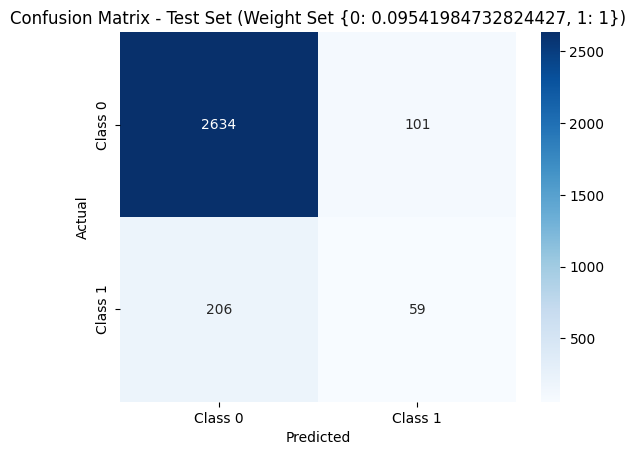


Training and Evaluating with Weight Set: {0: 0.00896487902392998, 1: 0.9910351209760699}
Epoch [5/20], Loss: 0.1843, Training Accuracy: 0.9132
Epoch [10/20], Loss: 0.1888, Training Accuracy: 0.9192
Epoch [15/20], Loss: 0.1287, Training Accuracy: 0.9304
Epoch [20/20], Loss: 0.0642, Training Accuracy: 0.9430
Test Accuracy for Weight Set {0: 0.00896487902392998, 1: 0.9910351209760699}: 0.8897


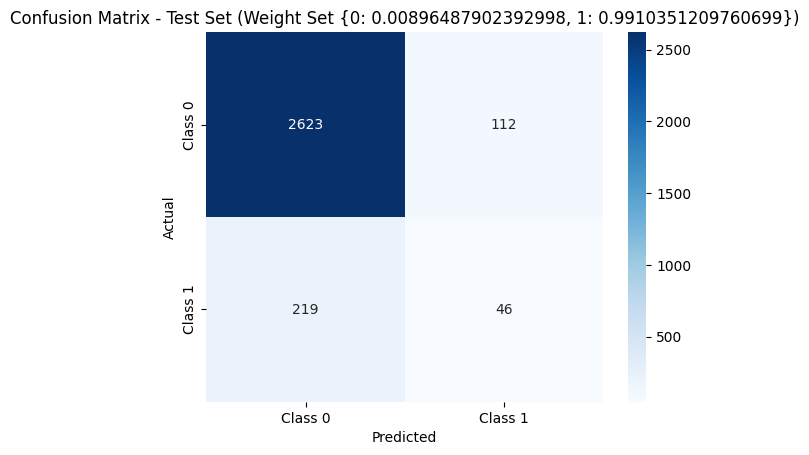


Training and Evaluating with Weight Set: {0: 0.03584837416030507, 1: 0.9641516258396949}
Epoch [5/20], Loss: 0.1838, Training Accuracy: 0.9138
Epoch [10/20], Loss: 0.1471, Training Accuracy: 0.9186
Epoch [15/20], Loss: 0.1141, Training Accuracy: 0.9312
Epoch [20/20], Loss: 0.1129, Training Accuracy: 0.9412
Test Accuracy for Weight Set {0: 0.03584837416030507, 1: 0.9641516258396949}: 0.8903


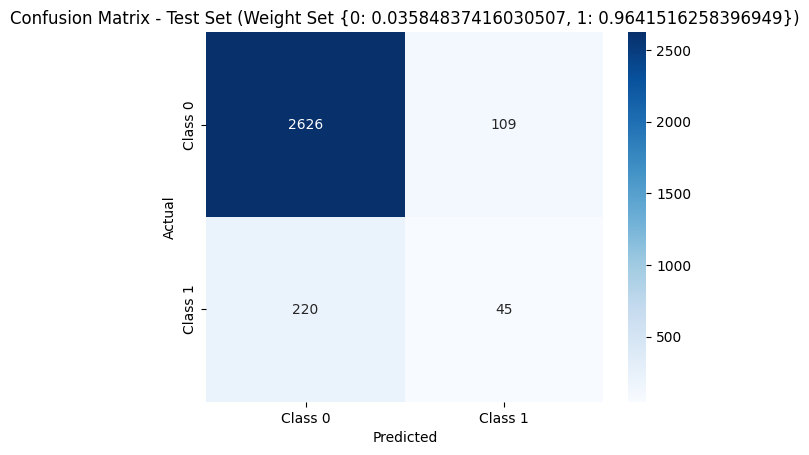


Model Evaluation Results:
                                        Weight Set Test Accuracy Test AUC-ROC  \
0                                 {0: 1, 1: 10.48}        0.8877       0.7946   
1                   {0: 0.09541984732824427, 1: 1}        0.8977       0.7929   
2  {0: 0.00896487902392998, 1: 0.9910351209760699}        0.8897       0.7862   
3  {0: 0.03584837416030507, 1: 0.9641516258396949}        0.8903       0.7979   

  F1 Class 0 F1 Class 1 Recall Class 0 Recall Class 1  
0     0.9390     0.2935         0.9481         0.2642  
1     0.9449     0.2776         0.9631         0.2226  
2     0.9406     0.2175         0.9590         0.1736  
3     0.9410     0.2148         0.9601         0.1698  


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, f1_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define hyperparameters
hidden_size1 = 128   # Size of the first hidden layer
hidden_size2 = 64    # Size of the second hidden layer
dropout = 0.2        # Dropout rate

# Define the model using nn.Sequential
def create_model():
    model = nn.Sequential(
        nn.Linear(X3_train_tensor.shape[1], hidden_size1),  # Input layer to first hidden layer
        nn.ReLU(),  # ReLU activation
        nn.Dropout(dropout),  # Dropout layer to prevent overfitting
        nn.Linear(hidden_size1, hidden_size2),  # First hidden layer to second hidden layer
        nn.ReLU(),  # ReLU activation
        nn.Dropout(dropout),  # Dropout layer to prevent overfitting
        nn.Linear(hidden_size2, 1),  # Second hidden layer to output layer
        nn.Sigmoid()  # Sigmoid activation for binary classification
    )
    return model

# Define optimizer (Adam)
optimizer = optim.Adam

# Define weights for each class
'''weights_list = [
    {0: 1, 1: 10.48},  # IR
    {0: (1/10.48), 1: 1},      # WCUSTOM WITH IR
    {0:0.00896487902392998, 1:0.9910351209760699},      # ICF
    {0:0.03584837416030507, 1:0.9641516258396949}       # LICF
]'''  #100k

'''weight_list = [
    {0: 1, 1: 10.58},
    {0: (1/10.58), 1: 1},
    {0:0.10308744939129459, 1:1.09421162},
    {0:0.12674908447458588, 1:1.0900341199999999}   #50k
]'''


'''weight_list = [
    {0: 1, 1: 10.40},
    {0: (1/10.40), 1: 1},
    {0:0.009153652845914623, 1:0.9908463471540853},
    {0:0.03633484727524011, 1:0.9636651527247599}
]'''   #20k

weight_list = [
    {0: 1, 1: 10.71},
    {0: (1/10.71), 1: 1},
    {0:0.008583156509528652, 1:0.9914168434904713},
    {0:0.034853779712300276, 1:0.9651462202876997}
]  #10k




# Initialize a list to store results
results = []

# Function to train and evaluate the model with each weight set
def train_and_evaluate(weight_set, model, optimizer):
    # Recreate the model and move it to the device
    model = create_model().to(device)

    # Initialize optimizer for each weight set
    optimizer = optimizer(model.parameters(), lr=0.001)

    # Define number of epochs for training
    epochs = 20
    batch_size = 64

    # Training loop
    for epoch in range(epochs):
        model.train()  # Set the model to training mode

        # Initialize variable for training accuracy tracking
        correct_train = 0
        total_train = 0

        # Mini-batch gradient descent
        for i in range(0, X3_train_tensor.shape[0], batch_size):
            # Get mini-batch
            batch_X3 = X3_train_tensor[i:i+batch_size].to(device)
            batch_y3 = y3_train_tensor[i:i+batch_size].to(device)

            # Create a weight tensor for the batch: shape should be [batch_size, 1]
            weight_tensor = torch.tensor([weight_set[int(label.item())] for label in batch_y3]).float().view(-1, 1).to(device)

            # Zero the gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(batch_X3)

            # Compute weighted loss
            criterion = nn.BCELoss()  # Using BCELoss without weight argument
            loss = criterion(outputs, batch_y3)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            # Track accuracy for training
            predicted = (outputs > 0.5).float()  # Apply threshold of 0.5 to get binary predictions
            correct_train += (predicted == batch_y3).sum().item()
            total_train += batch_y3.size(0)

        # Calculate and print training accuracy
        train_accuracy = correct_train / total_train
        if (epoch + 1) % 5 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Training Accuracy: {train_accuracy:.4f}")

    # Evaluate the model on the test set
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        y3_test_pred = model(X3_test_tensor.to(device)).cpu().numpy()
        y3_test_pred_class = (y3_test_pred > 0.5).astype(int)  # Convert sigmoid output to binary (0 or 1)

    # Calculate accuracy on test set
    test_accuracy = accuracy_score(y3_test_tensor.numpy(), y3_test_pred_class.flatten())
    print(f"Test Accuracy for Weight Set {weight_set}: {test_accuracy:.4f}")

    # Classification report and confusion matrix
    report = classification_report(y3_test_tensor.numpy(), y3_test_pred_class.flatten(), target_names=["Class 0", "Class 1"], output_dict=True)
    cm = confusion_matrix(y3_test_tensor.numpy(), y3_test_pred_class.flatten())

    # Calculate additional metrics
    f1_0 = f1_score(y3_test_tensor.numpy(), y3_test_pred_class.flatten(), pos_label=0)
    f1_1 = f1_score(y3_test_tensor.numpy(), y3_test_pred_class.flatten(), pos_label=1)
    recall_0 = recall_score(y3_test_tensor.numpy(), y3_test_pred_class.flatten(), pos_label=0)
    recall_1 = recall_score(y3_test_tensor.numpy(), y3_test_pred_class.flatten(), pos_label=1)
    auc_roc = roc_auc_score(y3_test_tensor.numpy(), y3_test_pred.flatten())

    # Store results for the current weight set with 4 decimal places
    results.append({
        'Weight Set': str(weight_set),
        'Test Accuracy': f"{test_accuracy:.4f}",
        'Test AUC-ROC': f"{auc_roc:.4f}",
        'F1 Class 0': f"{f1_0:.4f}",
        'F1 Class 1': f"{f1_1:.4f}",
        'Recall Class 0': f"{recall_0:.4f}",
        'Recall Class 1': f"{recall_1:.4f}"
    })

    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - Test Set (Weight Set {weight_set})')
    plt.show()

# Run the model for each weight set
for weight_set in weights_list:
    print(f"\nTraining and Evaluating with Weight Set: {weight_set}")
    train_and_evaluate(weight_set, create_model(), optimizer)

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results)

# Display the results as a table in the console
print("\nModel Evaluation Results:")
print(results_df)


#Dont Run


In [ ]:
def objective(trial):
    # Suggest hyperparameters to tune
    hidden_size1 = trial.suggest_int("hidden_size1", 64, 256)
    hidden_size2 = trial.suggest_int("hidden_size2", 32, 128)
    lr = trial.suggest_float("lr", 1e-4, 1e-2, log=True)
    dropout = trial.suggest_float("dropout", 0.1, 0.5)
    weight_decay = trial.suggest_float("weight_decay", 1e-6, 1e-3, log=True)

    # Define the MLP model
    model = nn.Sequential(
        nn.Linear(X1_train_tensor.shape[1], hidden_size1),
        nn.ReLU(),
        nn.Dropout(dropout),
        nn.Linear(hidden_size1, hidden_size2),
        nn.ReLU(),
        nn.Dropout(dropout),
        nn.Linear(hidden_size2, 1),
        nn.Sigmoid()
    )

    # Loss function and optimizer
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    criterion = nn.BCELoss()

    # Training loop for hyperparameter tuning
    for epoch in range(50):
        model.train()
        optimizer.zero_grad()
        output = model(X1_train_tensor)
        loss = criterion(output, y1_train_tensor)
        loss.backward()
        optimizer.step()

    # Evaluate on the validation set
    model.eval()
    with torch.no_grad():
        y_pred_valid = model(X1_valid_tensor).numpy()
        auc = roc_auc_score(y1_valid_tensor.numpy(), y_pred_valid)

    return auc  # Return the AUC score for validation

In [ ]:
# Initialize the Optuna study and maximize AUC
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=25)

# Display best hyperparameters
print("Best Parameters:", study.best_params)
print("Best Validation AUC:", study.best_value)

[I 2025-01-23 20:37:34,761] A new study created in memory with name: no-name-91888ac7-a3a7-4aae-b20b-b72cb1301c32
[I 2025-01-23 20:38:00,295] Trial 0 finished with value: 0.8244806878442518 and parameters: {'hidden_size1': 126, 'hidden_size2': 97, 'lr': 0.0016991491979246218, 'dropout': 0.44210473021198593, 'weight_decay': 2.104906293601996e-06}. Best is trial 0 with value: 0.8244806878442518.
[I 2025-01-23 20:38:21,092] Trial 1 finished with value: 0.8162451147241888 and parameters: {'hidden_size1': 123, 'hidden_size2': 88, 'lr': 0.0009252154795075678, 'dropout': 0.46932387909095286, 'weight_decay': 4.893953280019894e-05}. Best is trial 0 with value: 0.8244806878442518.
[I 2025-01-23 20:38:42,534] Trial 2 finished with value: 0.6068732884419417 and parameters: {'hidden_size1': 177, 'hidden_size2': 60, 'lr': 0.00012869560947892554, 'dropout': 0.2558375577746877, 'weight_decay': 8.387420898815543e-05}. Best is trial 0 with value: 0.8244806878442518.
[I 2025-01-23 20:38:58,371] Trial 3 f

In [ ]:
best_params = study.best_params

# Defining the final MLP model with best hyperparameters
final_model = nn.Sequential(
    nn.Linear(X1_train_tensor.shape[1], best_params["hidden_size1"]),
    nn.ReLU(),
    nn.Dropout(best_params["dropout"]),
    nn.Linear(best_params["hidden_size1"], best_params["hidden_size2"]),
    nn.ReLU(),
    nn.Dropout(best_params["dropout"]),
    nn.Linear(best_params["hidden_size2"], 1),
    nn.Sigmoid()
)

optimizer = optim.Adam(final_model.parameters(), lr=best_params["lr"], weight_decay=best_params["weight_decay"])
criterion = nn.BCELoss()

In [ ]:
# Early stopping and class imbalance handling
patience = 30  # Increased patience
best_valid_auc = 0
epochs_no_improve = 0

# Calculate class weights for imbalance handling
pos_weight = torch.tensor([10.482374555057985], dtype=torch.float32)  # Adjust the positive weight based on IR

# Updated loss function with class weights
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)

# Training loop
# Initialize lists to store the accuracies
train_accuracies = []
valid_accuracies = []
test_accuracies = []
train_auc_scores = []
valid_auc_scores = []
test_auc_scores = []

# Training loop with metrics for train, validation, and test sets
for epoch in range(100):
    final_model.train()
    optimizer.zero_grad()
    output_train = final_model(X1_train_tensor).flatten()

    # Compute training loss
    loss = criterion(output_train, y1_train_tensor.flatten())
    loss.backward()
    optimizer.step()

    # Calculate train accuracy and AUC
    y1_pred_train_binary = (torch.sigmoid(output_train) > 0.5).cpu().numpy().astype(int)
    train_accuracy = accuracy_score(y1_train_tensor.numpy(), y1_pred_train_binary)
    train_auc = roc_auc_score(y1_train_tensor.numpy(), torch.sigmoid(output_train).detach().numpy())

    # Validation
    final_model.eval()
    with torch.no_grad():
        y1_pred_valid_final = final_model(X1_valid_tensor).flatten()
        y1_pred_valid_binary = (torch.sigmoid(y1_pred_valid_final) > 0.5).cpu().numpy().astype(int)
        valid_accuracy = accuracy_score(y1_valid_tensor.numpy(), y1_pred_valid_binary)
        valid_auc = roc_auc_score(y1_valid_tensor.numpy(), torch.sigmoid(y1_pred_valid_final).detach().numpy())

    # Test
    with torch.no_grad():
        y1_pred_test_final = final_model(X1_test_tensor).flatten()
        y1_pred_test_binary = (torch.sigmoid(y1_pred_test_final) > 0.5).cpu().numpy().astype(int)
        test_accuracy = accuracy_score(y1_test_tensor.numpy(), y1_pred_test_binary)
        test_auc = roc_auc_score(y1_test_tensor.numpy(), torch.sigmoid(y1_pred_test_final).detach().numpy())

    # Store metrics for plotting
    train_accuracies.append(train_accuracy)
    valid_accuracies.append(valid_accuracy)
    test_accuracies.append(test_accuracy)
    train_auc_scores.append(train_auc)
    valid_auc_scores.append(valid_auc)
    test_auc_scores.append(test_auc)

    # Early stopping based on validation AUC
    if valid_auc > best_valid_auc:
        best_valid_auc = valid_auc
        epochs_no_improve = 0
        best_model_weights = final_model.state_dict()
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print(f"Early stopping at epoch {epoch} with best validation AUC: {best_valid_auc:.4f}")
            break

    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}, Train AUC: {train_auc:.4f}, Valid AUC: {valid_auc:.4f}")

In [ ]:
# Load the best model weights after training
final_model.load_state_dict(best_model_weights)

# Final evaluation on the test set
print(f"\nFinal Test Accuracy: {test_accuracy:.4f}")
print(f"Final Test AUC: {test_auc:.4f}")
print("Final Classification Report (Test Set):\n", classification_report(y1_test_tensor.numpy(), y1_pred_test_binary))
print("Final Confusion Matrix (Test Set):\n", confusion_matrix(y1_test_tensor.numpy(), y1_pred_test_binary))

#SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter

# Step 1: Make a copy of the dataset
balanced_data = processed_data.copy()
balanced_data

In [ ]:
class_counts2 = balanced_data ['HeartConditionBinary'].value_counts()
class_counts2

In [ ]:
Xb = processed_data.drop(columns=["HeartConditionBinary"])  # Features
yb = processed_data["HeartConditionBinary"]                # Target

# Step 2: Split data into training and testing sets
Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, yb, test_size=0.2, random_state=42, stratify=yb)

In [ ]:
# Step 3: Apply SMOTE to the training set
smote = SMOTE(random_state=42)
Xb_train_smote, yb_train_smote = smote.fit_resample(Xb_train, yb_train)

In [ ]:
# Step 4: Check the class distribution after SMOTE
print("Class distribution before SMOTE:", Counter(yb_train))
print("Class distribution after SMOTE:", Counter(yb_train_smote))

In [ ]:
scaler2 = StandardScaler()

# Fit on training data and transform both train and test sets
Xb_train_scaled = scaler2.fit_transform(Xb_train)
Xb_test_scaled = scaler2.transform(Xb_test)

In [ ]:
Xb_test_scaled_df = pd.DataFrame(Xb_test_scaled, columns=Xb_test.columns)
Xb_train_scaled_df = pd.DataFrame(Xb_train_scaled, columns=Xb_train.columns)

In [ ]:
modelsb = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=10),
    "Random Forest": RandomForestClassifier(random_state=10),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=10),
    "LightGBM": LGBMClassifier(random_state=10),
    "Naive Bayes": GaussianNB()
}

results = []

# Train and evaluate each model
for name, model in modelsb.items():
    print(f"Training {name}...")

    # Train the model
    model.fit(Xb_train_scaled, yb_train)

    # Predictions
    yb_train_pred = model.predict(Xb_train_scaled)
    yb_test_pred = model.predict(Xb_test_scaled)

    # Accuracy
    train_accuracy = accuracy_score(yb_train, yb_train_pred)
    test_accuracy = accuracy_score(yb_test, yb_test_pred)

    # AUC-ROC
    auc_roc = None
    if len(set(yb_test)) == 2:  # Check if binary classification
        yb_test_prob = model.predict_proba(Xb_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None
        if yb_test_prob is not None:
            auc_roc = roc_auc_score(yb_test, yb_test_prob)

    # Classification metrics
    classification_metrics = classification_report(
        yb_test, yb_test_pred, output_dict=True, target_names=["Class 0", "Class 1"]
    )
    f1_score_class_0 = classification_metrics["Class 0"]["f1-score"]
    f1_score_class_1 = classification_metrics["Class 1"]["f1-score"]
    recall_class_0 = classification_metrics["Class 0"]["recall"]
    recall_class_1 = classification_metrics["Class 1"]["recall"]

    # Store results
    results.append({
        "Model": name,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "AUC-ROC": auc_roc,
        "F1-Score (Class 0)": f1_score_class_0,
        "F1-Score (Class 1)": f1_score_class_1,
        "Recall (Class 0)": recall_class_0,
        "Recall (Class 1)": recall_class_1
    })

    # Print classification report
    print(f"\n{name} - Classification Report (Test Set):")
    print(classification_report(yb_test, yb_test_pred))

    # Confusion matrix
    cm = confusion_matrix(yb_test, yb_test_pred)
    print(f"\n{name} - Confusion Matrix (Test Set):")
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot(cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display results
print("\nModel Performance Results:")
print(results_df)

# Plotting train and test accuracy with values
plt.figure(figsize=(10, 6))
ax = results_df.set_index('Model')[['Train Accuracy', 'Test Accuracy']].plot(kind='bar', figsize=(10, 6))

# Annotating the bars with respective values
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')  # Display values up to 2 decimal points

plt.title("Train vs Test Accuracy for Models")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()